#   **Regression Model for Energy Consumption in Smart Grid Systems**

<p style="text-align:center;font-size:20px;font-weight:bold;"> NAME: ABHIDHA RAJAN M N</p>
<p style="text-align:center;font-size:20px;"> ORGANIZATION: ENTRI ELEVATE (DATA SCIENCE AND MACHINE LEARNING STUDENT )</p>
<p style="text-align:center;">DATE: 13/05/2024</p>

## Project Summary

### Objective:
The objective of this project is to analyze and forecast energy consumption in power grid systems to improve efficiency, reliability, and sustainability.

### Methodology:

1.Data Collection:
Gather historical energy consumption data from power grid systems.

2.Data Preprocessing:
Clean the data, handle missing values, and convert timestamps to a standard format,Outlier Detection and Treatment.

3.Exploratory Data Analysis (EDA) and Feature Engineering:
Analyze patterns, trends, and correlations in energy consumption data and add other columns from existing columns,Encoding and Feature Scaling/Normalization.

4.Model Development:
Selecting best features for model development.Develop predictive models (e.g., time series forecasting models like ARIMA, machine learning algorithms like SVR) to forecast future energy consumption.

5.Model Evaluation:
Evaluate model performance using validation techniques and metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

6.Model Deployment:
 Predicting energy consumption for the test dataset and saving the model


7.Documentation and Reporting:
   Documenting the entire process, including data sources, preprocessing steps, model selection,
   and evaluation
  Preparing a comprehensive report summarizing project findings, insights, and recommendations
  Communicating the results effectively to stakeholders, including non-technical audiences





# Problem Statement:
This project aims to develop a time series forecasting model for predicting energy consumption patterns in smart grid systems. By leveraging historical data on energy usage, weather conditions, holidays, and other relevant factors, the model seeks to forecast future energy consumption accurately. The goal is to optimize energy distribution and resource allocation, enabling efficient management of electricity grids. By forecasting energy consumption patterns, this project contributes to reducing costs, improving grid reliability, and promoting sustainability in energy management.

# 1.Data collection(Know Your Data)¶

In [4]:
# importing libraries for analysis and visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks

# importing datetime library
from datetime import datetime
import datetime as dt

#  import Library of warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
#loading dataset as df
df=pd.read_csv("/content/energy_consumption_dataset -jithapnair.csv")

#displaying dataset head
df.head()

,Date/Time,Temperature,Humidity,Day of Week,Time of Day,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption
0,2020-01-01 00:00:00,17.440675,73.264794,Wednesday,00:00,Fall,1,4437.698981,1799.303909,0.123206,12.228164,0.059692,169.032542,1469.402213,1367.517344
1,2020-01-01 01:00:00,25.759468,29.280938,Wednesday,01:00,Spring,1,2240.248004,2109.917892,0.096013,14.950992,19.246831,705.612502,169.805891,4078.500517
2,2020-01-01 02:00:00,20.138169,55.772252,Wednesday,02:00,Winter,0,1443.646518,2814.549791,0.161145,11.384525,10.978002,268.142230,1988.009121,4614.282050
3,2020-01-01 03:00:00,17.244159,87.520015,Wednesday,03:00,Summer,0,2325.184898,4680.163261,0.272355,10.109367,2.472984,262.186871,174.970181,3578.730578
4,2020-01-01 04:00:00,11.182740,26.383045,Wednesday,04:00,Fall,0,1552.041035,4080.463060,0.163503,9.012346,4.509169,486.224719,1004.081112,4194.210499


In [6]:
# Shape of df
df.shape

(43825, 15)


The shape of the dataset is 43825x15 means it having 43825 rows and 15 columns.

In [ ]:
# Dataset informations , Rows and columns cound
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date/Time                           43825 non-null  object 
 1   Temperature                         43825 non-null  float64
 2   Humidity                            43825 non-null  float64
 3   Day of Week                         43825 non-null  object 
 4   Time of Day                         43825 non-null  object 
 5   Season                              43825 non-null  object 
 6   Holiday Indicator                   43825 non-null  int64  
 7   Previous Day's Energy Consumption   43825 non-null  float64
 8   Previous Week's Energy Consumption  43825 non-null  float64
 9   Energy Price                        43825 non-null  float64
 10  Daylight Hours                      43825 non-null  float64
 11  Wind Speed                          43825


The dataset contains 15 columns out of which 11 are numeric and 4 are object type.

There is no null objects present in the dataset

In [ ]:
#Statistical information of numeric columns of data
df.describe()

,Temperature,Humidity,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption
count,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000
mean,14.890011,55.001300,0.050633,3004.992815,3007.367131,0.174295,11.979391,9.968398,498.817391,1023.628163,3008.245695
std,14.476096,20.201569,0.219250,1150.099329,1158.462428,0.072037,2.310568,5.787710,288.424913,562.421323,1153.422006
min,-9.996378,20.000232,0.000000,1000.251530,1000.054170,0.050005,8.000024,0.000416,0.035109,50.011787,1000.033142
25%,2.318324,37.402173,0.000000,2013.068826,1995.962354,0.111768,9.968250,4.956682,248.935625,537.001881,2012.751540
50%,14.886739,54.965030,0.000000,3013.983220,3012.369499,0.174438,11.971855,9.933075,499.333064,1021.824580,3017.398352
75%,27.454544,72.478944,0.000000,4004.036776,4014.428878,0.236505,13.978746,14.962423,748.138519,1511.251895,4008.610275
max,39.998898,89.997775,1.000000,4999.898186,4999.996048,0.299999,15.999874,19.999240,999.927153,1999.989309,4999.915113


# 2.Data Preprocessing:

In [ ]:
# Checking for duplicates
df[df.duplicated()]

,Date/Time,Temperature,Humidity,Day of Week,Time of Day,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption


No duplicates present in the dataset

In [ ]:
#Missing values or null values
df.isnull().sum()

Date/Time                             0
Temperature                           0
Humidity                              0
Day of Week                           0
Time of Day                           0
Season                                0
Holiday Indicator                     0
Previous Day's Energy Consumption     0
Previous Week's Energy Consumption    0
Energy Price                          0
Daylight Hours                        0
Wind Speed                            0
Solar Irradiance                      0
Population Density                    0
Energy Consumption                    0
dtype: int64

There is no null values

### Understanding the variables in dataset

In [ ]:
#Columns
df.columns

Index(['Date/Time', 'Temperature', 'Humidity', 'Day of Week', 'Time of Day',
       'Season', 'Holiday Indicator', 'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption'],
      dtype='object')

Variable Description
Date/Time : Date and Time of 5 years of data.

Temperature: The tepmerature in the particular time in celsius

Humidity: Humidity in the particular time

Day of Week : Column showing the day of that week

Time of Day : Time of that particular day

Season : Columns shows the season of that day

Holiday Indicator : Column indicate the particular day is either holiday or not

Previous Day's Energy Consumption : Column shows the engery consumption in the previous day

Previous Week's Energy Consumption :Column shows the engery consumption in the previous week

Energy Price : The price of energy

Daylight Hours : Count of hours of daylight

Wind Speed : Column which showing speed of wind

Solar Irradiance : Power of solar radiation per unit area

Population Density : Population per area

Energy Consumption : Target variable, the amount of energy used in powergrid systems

In [ ]:
# Checking unique values for each variables

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for     '{column}'      : {unique_values}")


Unique values for     'Date/Time'      : ['2020-01-01 00:00:00' '2020-01-01 01:00:00' '2020-01-01 02:00:00' ...
 '2024-12-30 22:00:00' '2024-12-30 23:00:00' '2024-12-31 00:00:00']
Unique values for     'Temperature'      : [17.4406752  25.75946832 20.1381688  ... 23.73033487 12.92150742
 23.66424366]
Unique values for     'Humidity'      : [73.26479352 29.28093807 55.77225187 ... 70.77691216 40.56716829
 52.84054072]
Unique values for     'Day of Week'      : ['Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday']
Unique values for     'Time of Day'      : ['00:00' '01:00' '02:00' '03:00' '04:00' '05:00' '06:00' '07:00' '08:00'
 '09:00' '10:00' '11:00' '12:00' '13:00' '14:00' '15:00' '16:00' '17:00'
 '18:00' '19:00' '20:00' '21:00' '22:00' '23:00']
Unique values for     'Season'      : ['Fall' 'Spring' 'Winter' 'Summer']
Unique values for     'Holiday Indicator'      : [1 0]
Unique values for     'Previous Day's Energy Consumption'      : [4437.69898123 2240.24800432 1



*   Date/Time column having 5 year date and time
*  The unique days are 7 means a complete week days are selected
*  A day (24hrs) is equally splitted as 24,1Hr each
*  4 Unique Seasons are 'Fall', 'Spring', 'Winter' and'Summer'
*  The Holiday indicator is binary

 Rest column values are not in the unique category



In [7]:
# Creating copy of df for to make changes and evaluation
df1 = df.copy()
df1

,Date/Time,Temperature,Humidity,Day of Week,Time of Day,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption
0,2020-01-01 00:00:00,17.440675,73.264794,Wednesday,00:00,Fall,1,4437.698981,1799.303909,0.123206,12.228164,0.059692,169.032542,1469.402213,1367.517344
1,2020-01-01 01:00:00,25.759468,29.280938,Wednesday,01:00,Spring,1,2240.248004,2109.917892,0.096013,14.950992,19.246831,705.612502,169.805891,4078.500517
2,2020-01-01 02:00:00,20.138169,55.772252,Wednesday,02:00,Winter,0,1443.646518,2814.549791,0.161145,11.384525,10.978002,268.142230,1988.009121,4614.282050
3,2020-01-01 03:00:00,17.244159,87.520015,Wednesday,03:00,Summer,0,2325.184898,4680.163261,0.272355,10.109367,2.472984,262.186871,174.970181,3578.730578
4,2020-01-01 04:00:00,11.182740,26.383045,Wednesday,04:00,Fall,0,1552.041035,4080.463060,0.163503,9.012346,4.509169,486.224719,1004.081112,4194.210499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2024-12-30 20:00:00,16.224974,45.931201,Monday,20:00,Summer,1,3299.135828,3069.518353,0.135656,12.340619,3.685611,666.593466,1538.228889,1087.122191
43821,2024-12-30 21:00:00,-2.638805,64.145829,Monday,21:00,Fall,0,1435.657343,1185.862843,0.238843,11.169718,6.561095,772.779958,1641.830840,4277.546615
43822,2024-12-30 22:00:00,23.730335,70.776912,Monday,22:00,Spring,0,3441.205510,3003.358652,0.209155,15.948723,7.276048,567.131701,1800.057131,2915.121073
43823,2024-12-30 23:00:00,12.921507,40.567168,Monday,23:00,Spring,0,1200.156417,4850.113450,0.286449,14.597026,7.211708,27.142705,926.475955,2944.563179


## Extract some  columns from the existing columns to make the model more accurate

In [8]:
## Changing Date/Time column to Month,Date,Year and Quarter.

# Convert "Date/Time" column to datetime format
df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])

# Extract year and create a new column named "Year"
df1['Year'] = df1['Date/Time'].dt.year
df1['Month']=df1['Date/Time'].dt.month
df1['Date']=df1['Date/Time'].dt.date

# Grouping the created month column as quaters
df1['Quarter'] = df1['Month'].apply(lambda x: (x - 1) // 3 + 1)



In [ ]:
# Displaying the changed df
df1.head()

,Date/Time,Temperature,Humidity,Day of Week,Time of Day,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Energy Consumption,Year,Month,Date,Quarter
0,2020-01-01 00:00:00,17.440675,73.264794,Wednesday,00:00,Fall,1,4437.698981,1799.303909,0.123206,12.228164,0.059692,169.032542,1469.402213,1367.517344,2020,1,2020-01-01,1
1,2020-01-01 01:00:00,25.759468,29.280938,Wednesday,01:00,Spring,1,2240.248004,2109.917892,0.096013,14.950992,19.246831,705.612502,169.805891,4078.500517,2020,1,2020-01-01,1
2,2020-01-01 02:00:00,20.138169,55.772252,Wednesday,02:00,Winter,0,1443.646518,2814.549791,0.161145,11.384525,10.978002,268.142230,1988.009121,4614.282050,2020,1,2020-01-01,1
3,2020-01-01 03:00:00,17.244159,87.520015,Wednesday,03:00,Summer,0,2325.184898,4680.163261,0.272355,10.109367,2.472984,262.186871,174.970181,3578.730578,2020,1,2020-01-01,1
4,2020-01-01 04:00:00,11.182740,26.383045,Wednesday,04:00,Fall,0,1552.041035,4080.463060,0.163503,9.012346,4.509169,486.224719,1004.081112,4194.210499,2020,1,2020-01-01,1


In [9]:
# Extracted Hour from Time of day Column
df1['Hour'] = pd.to_datetime(df['Time of Day'], format='%H:%M').dt.hour

# Dropping the unwanted column
df1.drop(columns=['Time of Day'],inplace=True)

In [10]:
## Temperature and Humidity Related Features:

df1['Temperature_Humidity_Product']=df1['Temperature'] * df1['Humidity']


In the context of analyzing energy consumption, the Temperature_Humidity_Product (THP) is a derived metric that combines temperature and humidity to provide a single value that represents the environmental conditions impacting energy use. This metric is particularly useful in understanding the effects of both temperature and humidity on energy consumption

In [ ]:
df1

,Temperature,Humidity,Day of Week,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,...,Year,Month,Date,Quarter,Hour,Temp_Rolling_Avg,Humidity_Rolling_Avg,Temp_Change,Humidity_Change,Temperature_Humidity_Product
Date/Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 06:00:00,11.879361,82.593109,Wednesday,Spring,0,3665.938108,4926.030664,0.062616,11.805963,15.142984,...,2020,1,2020-01-01,1,6,17.991325,60.606133,-10.415345,13.164329,981.153319
2020-01-01 07:00:00,34.588650,70.686514,Wednesday,Spring,1,4736.767919,2587.785483,0.205218,10.209285,10.455741,...,2020,1,2020-01-01,1,7,20.441036,60.237807,22.709289,-11.906595,2444.951094
2020-01-01 08:00:00,38.183138,71.695264,Wednesday,Spring,0,1299.561527,1438.979010,0.132460,11.517329,1.366344,...,2020,1,2020-01-01,1,8,22.215846,66.296997,3.594488,1.008750,2737.550153
2020-01-01 09:00:00,9.172076,51.134165,Wednesday,Summer,0,2990.659766,3636.713517,0.211614,13.900593,8.020126,...,2020,1,2020-01-01,1,9,20.649261,65.634413,-29.011062,-20.561099,469.006446
2020-01-01 10:00:00,29.586252,54.902958,Wednesday,Fall,0,1170.411937,2887.361825,0.085524,10.533756,2.587446,...,2020,1,2020-01-01,1,10,22.412417,60.974833,20.414176,3.768793,1624.372740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 20:00:00,16.224974,45.931201,Monday,Summer,1,3299.135828,3069.518353,0.135656,12.340619,3.685611,...,2024,12,2024-12-30,4,20,16.668192,44.269398,-13.440687,11.400289,745.232531
2024-12-30 21:00:00,-2.638805,64.145829,Monday,Fall,0,1435.657343,1185.862843,0.238843,11.169718,6.561095,...,2024,12,2024-12-30,4,21,11.236570,49.509588,-18.863779,18.214628,-169.268331
2024-12-30 22:00:00,23.730335,70.776912,Monday,Spring,0,3441.205510,3003.358652,0.209155,15.948723,7.276048,...,2024,12,2024-12-30,4,22,10.480017,56.599604,26.369140,6.631083,1679.559827


In [ ]:
# Checking for null values
df1.isnull().sum()

Date/Time                             0
Temperature                           0
Humidity                              0
Day of Week                           0
Season                                0
Holiday Indicator                     0
Previous Day's Energy Consumption     0
Previous Week's Energy Consumption    0
Energy Price                          0
Daylight Hours                        0
Wind Speed                            0
Solar Irradiance                      0
Population Density                    0
Energy Consumption                    0
Year                                  0
Month                                 0
Date                                  0
Quarter                               0
Hour                                  0
Temperature_Humidity_Product          0
dtype: int64

In [11]:
# Sort the DataFrame by Date/Time
df1 = df1.sort_values('Date/Time')

# Set the Date/Time as the index (it is  useful for time series operations)
df1.set_index('Date/Time', inplace=True)

In [12]:
# Energy Consumption Features:

# Calculate the difference in energy consumption compared to the previous day
df1['Prev_Day_Energy_Change'] = df1['Energy Consumption'].diff()

# Calculate the difference in energy consumption compared to the same day in the previous week
df1['Prev_Week_Energy_Change'] = df1['Energy Consumption'].diff(periods=7)

# Calculate the rolling average of energy consumption over a specified period (e.g., 7 days)
df1['Rolling_Avg_Energy'] = df1['Energy Consumption'].rolling(window=7).mean()

# Calculate the energy consumption from 7 days ago
df1['Energy_Consumption_Lag_7'] = df1['Energy Consumption'].shift(7)

1.Prev_Day_Energy_Change: Highlights daily changes and trends, useful for detecting short-term anomalies.

2.Prev_Week_Energy_Change: Captures weekly changes, facilitating the analysis of weekly cyclical patterns.

3.Rolling_Avg_Energy: Smooths out daily variations to reveal longer-term trends and establish consumption baselines.

4.Energy_Consumption_Lag_7: Provides historical context by showing energy usage from the same day in the previous week.


In [10]:
# Displaying the changed df
df1

,Temperature,Humidity,Day of Week,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,...,Year,Month,Date,Quarter,Hour,Temperature_Humidity_Product,Prev_Day_Energy_Change,Prev_Week_Energy_Change,Rolling_Avg_Energy,Energy_Consumption_Lag_7
Date/Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,17.440675,73.264794,Wednesday,Fall,1,4437.698981,1799.303909,0.123206,12.228164,0.059692,...,2020,1,2020-01-01,1,0,1277.787467,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,25.759468,29.280938,Wednesday,Spring,1,2240.248004,2109.917892,0.096013,14.950992,19.246831,...,2020,1,2020-01-01,1,1,754.261397,2710.983172,NaN,NaN,NaN
2020-01-01 02:00:00,20.138169,55.772252,Wednesday,Winter,0,1443.646518,2814.549791,0.161145,11.384525,10.978002,...,2020,1,2020-01-01,1,2,1123.151023,535.781533,NaN,NaN,NaN
2020-01-01 03:00:00,17.244159,87.520015,Wednesday,Summer,0,2325.184898,4680.163261,0.272355,10.109367,2.472984,...,2020,1,2020-01-01,1,3,1509.209064,-1035.551472,NaN,NaN,NaN
2020-01-01 04:00:00,11.182740,26.383045,Wednesday,Fall,0,1552.041035,4080.463060,0.163503,9.012346,4.509169,...,2020,1,2020-01-01,1,4,295.034731,615.479921,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 20:00:00,16.224974,45.931201,Monday,Summer,1,3299.135828,3069.518353,0.135656,12.340619,3.685611,...,2024,12,2024-12-30,4,20,745.232531,-2959.496599,-2401.846698,2086.993004,3488.968889
2024-12-30 21:00:00,-2.638805,64.145829,Monday,Fall,0,1435.657343,1185.862843,0.238843,11.169718,6.561095,...,2024,12,2024-12-30,4,21,-169.268331,3190.424425,2555.899141,2452.121453,1721.647474
2024-12-30 22:00:00,23.730335,70.776912,Monday,Spring,0,3441.205510,3003.358652,0.209155,15.948723,7.276048,...,2024,12,2024-12-30,4,22,1679.559827,-1362.425542,1439.809990,2657.808594,1475.311082


In [11]:
# Checking for null values
df1.isnull().sum()

Temperature                           0
Humidity                              0
Day of Week                           0
Season                                0
Holiday Indicator                     0
Previous Day's Energy Consumption     0
Previous Week's Energy Consumption    0
Energy Price                          0
Daylight Hours                        0
Wind Speed                            0
Solar Irradiance                      0
Population Density                    0
Energy Consumption                    0
Year                                  0
Month                                 0
Date                                  0
Quarter                               0
Hour                                  0
Temperature_Humidity_Product          0
Prev_Day_Energy_Change                1
Prev_Week_Energy_Change               7
Rolling_Avg_Energy                    6
Energy_Consumption_Lag_7              7
dtype: int64

There is having some null values in the new 4 columns.
Lets remove it by using dropna

In [13]:
#Removing the null values from df1
df1.dropna(inplace=True)

In [ ]:
#Check whether the null values are removed or not
df1.isnull().sum()

Temperature                           0
Humidity                              0
Day of Week                           0
Season                                0
Holiday Indicator                     0
Previous Day's Energy Consumption     0
Previous Week's Energy Consumption    0
Energy Price                          0
Daylight Hours                        0
Wind Speed                            0
Solar Irradiance                      0
Population Density                    0
Energy Consumption                    0
Year                                  0
Month                                 0
Date                                  0
Quarter                               0
Hour                                  0
Temperature_Humidity_Product          0
Prev_Day_Energy_Change                0
Prev_Week_Energy_Change               0
Rolling_Avg_Energy                    0
Energy_Consumption_Lag_7              0
dtype: int64

All null values are removed

In [13]:
# Checking the maximum and minimum values of Population desity column to make labels for new column

print(df1['Population Density'].max())
print(df1['Population Density'].min())

1999.989308641208
50.01178745155313


In [14]:
## Population Density Features:

# Define bins and labels
bins = [0, 500, 1000 ,float('inf')]  # Define bin edges
labels = ['low', 'medium', 'high']   # Define bin labels

# Categorize Population Density into bins
df1['Population_Density_Category'] = pd.cut(df1['Population Density'], bins=bins, labels=labels, right=False)

Categorizing population density into 'low', 'medium', and 'high' provides a useful framework for understanding and analyzing energy consumption patterns. It allows for deep insights into how population concentration affects energy usage, efficiency, and infrastructure needs

In [ ]:
#Displaying the df
df1

,Temperature,Humidity,Day of Week,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,...,Month,Date,Quarter,Hour,Temperature_Humidity_Product,Prev_Day_Energy_Change,Prev_Week_Energy_Change,Rolling_Avg_Energy,Energy_Consumption_Lag_7,Population_Density_Category
Date/Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 07:00:00,34.588650,70.686514,Wednesday,Spring,1,4736.767919,2587.785483,0.205218,10.209285,10.455741,...,1,2020-01-01,1,7,2444.951094,462.892506,1438.858453,3568.297090,1367.517344,high
2020-01-01 08:00:00,38.183138,71.695264,Wednesday,Spring,0,1299.561527,1438.979010,0.132460,11.517329,1.366344,...,1,2020-01-01,1,8,2737.550153,-261.791962,-1533.916680,3349.166136,4078.500517,medium
2020-01-01 09:00:00,9.172076,51.134165,Wednesday,Summer,0,2990.659766,3636.713517,0.211614,13.900593,8.020126,...,1,2020-01-01,1,9,469.006446,-828.282139,-2897.980353,2935.168943,4614.282050,medium
2020-01-01 10:00:00,29.586252,54.902958,Wednesday,Fall,0,1170.411937,2887.361825,0.085524,10.533756,2.587446,...,1,2020-01-01,1,10,1624.372740,-573.410363,-2435.839244,2587.191908,3578.730578,low
2020-01-01 11:00:00,16.444746,75.968700,Wednesday,Spring,0,4006.636730,4284.711832,0.202654,12.656923,17.370004,...,1,2020-01-01,1,11,1249.285975,-51.089793,-3102.408958,2143.990628,4194.210499,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 20:00:00,16.224974,45.931201,Monday,Summer,1,3299.135828,3069.518353,0.135656,12.340619,3.685611,...,12,2024-12-30,4,20,745.232531,-2959.496599,-2401.846698,2086.993004,3488.968889,high
2024-12-30 21:00:00,-2.638805,64.145829,Monday,Fall,0,1435.657343,1185.862843,0.238843,11.169718,6.561095,...,12,2024-12-30,4,21,-169.268331,3190.424425,2555.899141,2452.121453,1721.647474,high
2024-12-30 22:00:00,23.730335,70.776912,Monday,Spring,0,3441.205510,3003.358652,0.209155,15.948723,7.276048,...,12,2024-12-30,4,22,1679.559827,-1362.425542,1439.809990,2657.808594,1475.311082,high


In [ ]:
# Checking for null values
df1.isnull().sum()

Temperature                           0
Humidity                              0
Day of Week                           0
Season                                0
Holiday Indicator                     0
Previous Day's Energy Consumption     0
Previous Week's Energy Consumption    0
Energy Price                          0
Daylight Hours                        0
Wind Speed                            0
Solar Irradiance                      0
Population Density                    0
Energy Consumption                    0
Year                                  0
Month                                 0
Date                                  0
Quarter                               0
Hour                                  0
Temperature_Humidity_Product          0
Prev_Day_Energy_Change                0
Prev_Week_Energy_Change               0
Rolling_Avg_Energy                    0
Energy_Consumption_Lag_7              0
Population_Density_Category           0
dtype: int64

No null values

In [ ]:
#  Displaying the column names
df1.columns

Index(['Temperature', 'Humidity', 'Day of Week', 'Season', 'Holiday Indicator',
       'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption', 'Year', 'Month', 'Date', 'Quarter', 'Hour',
       'Temperature_Humidity_Product', 'Prev_Day_Energy_Change',
       'Prev_Week_Energy_Change', 'Rolling_Avg_Energy',
       'Energy_Consumption_Lag_7', 'Population_Density_Category'],
      dtype='object')

In [ ]:
df1.shape

(43818, 24)

Initially there is only 15 columns are there. New 11 columns are extracted from the original columns and Date/Time column from the original column is set as the index and Time of day column is removed.7 Rows are removed because of null values. So finally 43818 rows and 24 columns are in the final dataframe.

In [ ]:
# Checking dtypes
df1.dtypes

Temperature                            float64
Humidity                               float64
Day of Week                             object
Season                                  object
Holiday Indicator                        int64
Previous Day's Energy Consumption      float64
Previous Week's Energy Consumption     float64
Energy Price                           float64
Daylight Hours                         float64
Wind Speed                             float64
Solar Irradiance                       float64
Population Density                     float64
Energy Consumption                     float64
Year                                     int32
Month                                    int32
Date                                    object
Quarter                                  int64
Hour                                     int32
Temperature_Humidity_Product           float64
Prev_Day_Energy_Change                 float64
Prev_Week_Energy_Change                float64
Rolling_Avg_E

There are 3 object dtype in which 2 are categorical and also a  category column is there. Other 20 columns are float and int dtype.


In [15]:
# Round values in specified columns to two decimals
columns_to_round = ['Temperature', 'Humidity',
                    "Previous Day's Energy Consumption",
                    "Previous Week's Energy Consumption",
                    'Energy Price', 'Daylight Hours',
                    'Wind Speed', 'Solar Irradiance',
                    'Population Density', 'Energy Consumption',
                    'Temperature_Humidity_Product',
                     'Prev_Day_Energy_Change', 'Prev_Week_Energy_Change',
                     'Rolling_Avg_Energy', 'Energy_Consumption_Lag_7' ]

df1[columns_to_round] = df1[columns_to_round].round(2)

In [ ]:
# Displaying the rounded df
df1.head(2)

,Temperature,Humidity,Day of Week,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,...,Month,Date,Quarter,Hour,Temperature_Humidity_Product,Prev_Day_Energy_Change,Prev_Week_Energy_Change,Rolling_Avg_Energy,Energy_Consumption_Lag_7,Population_Density_Category
Date/Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 07:00:00,34.59,70.69,Wednesday,Spring,1,4736.77,2587.79,0.21,10.21,10.46,...,1,2020-01-01,1,7,2444.95,462.89,1438.86,3568.30,1367.52,high
2020-01-01 08:00:00,38.18,71.70,Wednesday,Spring,0,1299.56,1438.98,0.13,11.52,1.37,...,1,2020-01-01,1,8,2737.55,-261.79,-1533.92,3349.17,4078.50,medium


### Finding Outliers

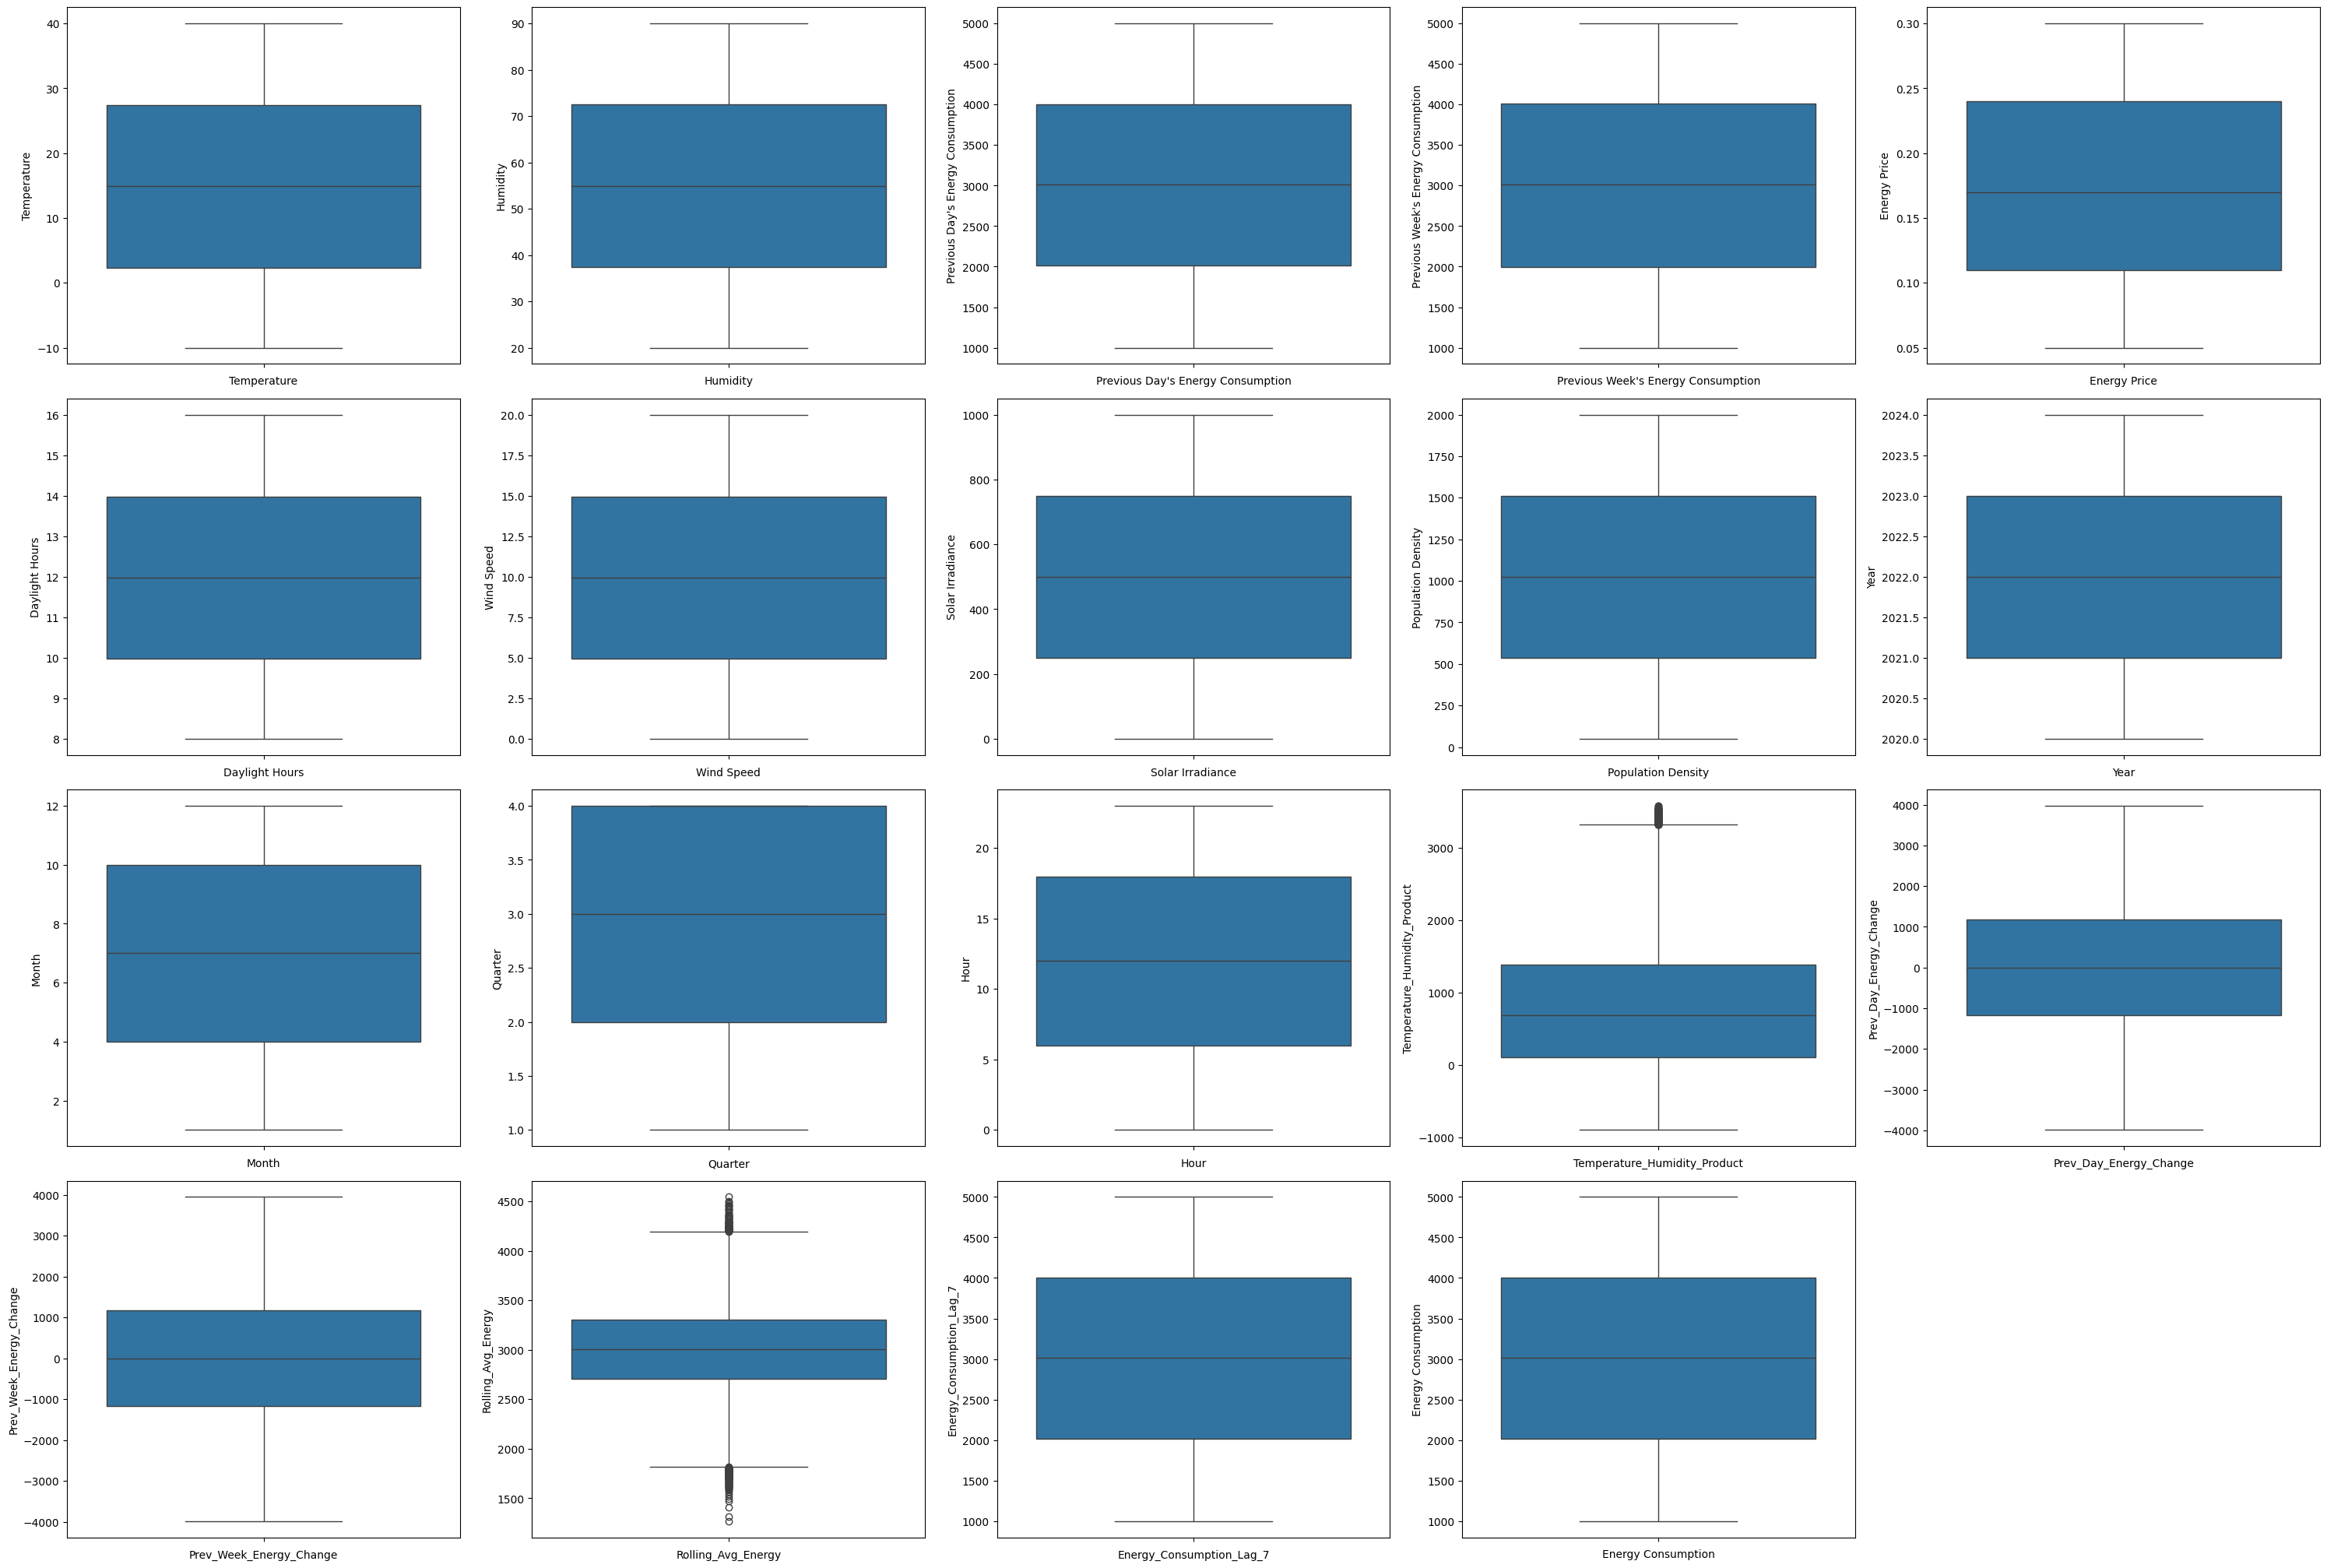

In [16]:
#box plot to identify outliers

fig = plt.figure(figsize=(30,30))
counter = 0

columns=['Temperature', 'Humidity',
       "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
      'Year', 'Month', 'Quarter', 'Hour',
      'Temperature_Humidity_Product',
       'Prev_Day_Energy_Change', 'Prev_Week_Energy_Change',
       'Rolling_Avg_Energy', 'Energy_Consumption_Lag_7','Energy Consumption']


for col in columns:
    fig.add_subplot(6,5,counter+1)
    sns.boxplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1



plt.tight_layout()
plt.show()

Some columns are showing outliers. Lets examine it by using Z score method.


The Z-score measures the number of standard deviations a data point is from the mean of the dataset.Using the Z-score for outlier removal is a common method in statistical analysis to identify and exclude outliers from dataset.

In [16]:
from scipy import stats

columns=['Temperature', 'Humidity',
       "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
      'Year', 'Month', 'Quarter', 'Hour',
      'Temperature_Humidity_Product',
       'Prev_Day_Energy_Change', 'Prev_Week_Energy_Change',
       'Rolling_Avg_Energy', 'Energy_Consumption_Lag_7','Energy Consumption']

# Calculate Z-scores for each column
z_scores = np.abs(stats.zscore(df1[columns]))

# Identify outliers (e.g., Z-score > 3)
outliers = np.where(z_scores > 3)

# Display the outliers
outliers


(array([   63,   253,   315,   316,  2616,  3406,  3569,  3627,  5749,
         6256,  7597,  7598,  9494,  9571, 11659, 12864, 12905, 12906,
        14014, 14519, 15380, 16541, 18753, 19501, 19504, 19505, 21310,
        22082, 22096, 22262, 23379, 24040, 24712, 24876, 24877, 25368,
        26710, 26711, 26713, 27789, 27919, 27921, 27922, 27923, 28290,
        28554, 28976, 29301, 30746, 30880, 30881, 30970, 31811, 32054,
        33715, 33800, 33878, 33880, 35865, 36552, 36555, 36556, 37879,
        37881, 38922, 39908, 39909, 39954, 39955, 40928, 42011, 42116,
        42117, 42194, 42323, 42772, 42863, 42864, 42865, 42866, 43618]),
 array([16, 16, 16, 16, 16, 16, 16, 16, 13, 16, 16, 16, 13, 16, 16, 13, 16,
        16, 16, 16, 16, 13, 13, 13, 16, 16, 16, 16, 16, 16, 13, 13, 13, 16,
        16, 16, 16, 16, 16, 13, 16, 16, 16, 16, 13, 16, 16, 16, 13, 16, 16,
        13, 13, 16, 16, 13, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,

In [17]:
# Removing Outliers and Saved the outlier removal dataset ad df_new.

df_new = df1[(z_scores < 3).all(axis=1)]

#Displaying df_new
df_new

,Temperature,Humidity,Day of Week,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,...,Month,Date,Quarter,Hour,Temperature_Humidity_Product,Prev_Day_Energy_Change,Prev_Week_Energy_Change,Rolling_Avg_Energy,Energy_Consumption_Lag_7,Population_Density_Category
Date/Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 07:00:00,34.59,70.69,Wednesday,Spring,1,4736.77,2587.79,0.21,10.21,10.46,...,1,2020-01-01,1,7,2444.95,462.89,1438.86,3568.30,1367.52,high
2020-01-01 08:00:00,38.18,71.70,Wednesday,Spring,0,1299.56,1438.98,0.13,11.52,1.37,...,1,2020-01-01,1,8,2737.55,-261.79,-1533.92,3349.17,4078.50,medium
2020-01-01 09:00:00,9.17,51.13,Wednesday,Summer,0,2990.66,3636.71,0.21,13.90,8.02,...,1,2020-01-01,1,9,469.01,-828.28,-2897.98,2935.17,4614.28,medium
2020-01-01 10:00:00,29.59,54.90,Wednesday,Fall,0,1170.41,2887.36,0.09,10.53,2.59,...,1,2020-01-01,1,10,1624.37,-573.41,-2435.84,2587.19,3578.73,low
2020-01-01 11:00:00,16.44,75.97,Wednesday,Spring,0,4006.64,4284.71,0.20,12.66,17.37,...,1,2020-01-01,1,11,1249.29,-51.09,-3102.41,2143.99,4194.21,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 20:00:00,16.22,45.93,Monday,Summer,1,3299.14,3069.52,0.14,12.34,3.69,...,12,2024-12-30,4,20,745.23,-2959.50,-2401.85,2086.99,3488.97,high
2024-12-30 21:00:00,-2.64,64.15,Monday,Fall,0,1435.66,1185.86,0.24,11.17,6.56,...,12,2024-12-30,4,21,-169.27,3190.42,2555.90,2452.12,1721.65,high
2024-12-30 22:00:00,23.73,70.78,Monday,Spring,0,3441.21,3003.36,0.21,15.95,7.28,...,12,2024-12-30,4,22,1679.56,-1362.43,1439.81,2657.81,1475.31,high


In [19]:
# Shape of new df
print("Shape of new df is "  ,df_new.shape)

# Shape of Old df

print(" Shape of Old df is"  , df1.shape)

Shape of new df is  (43737, 24)
 Shape of Old df is (43818, 24)


 81 Rows are removed as Outliers

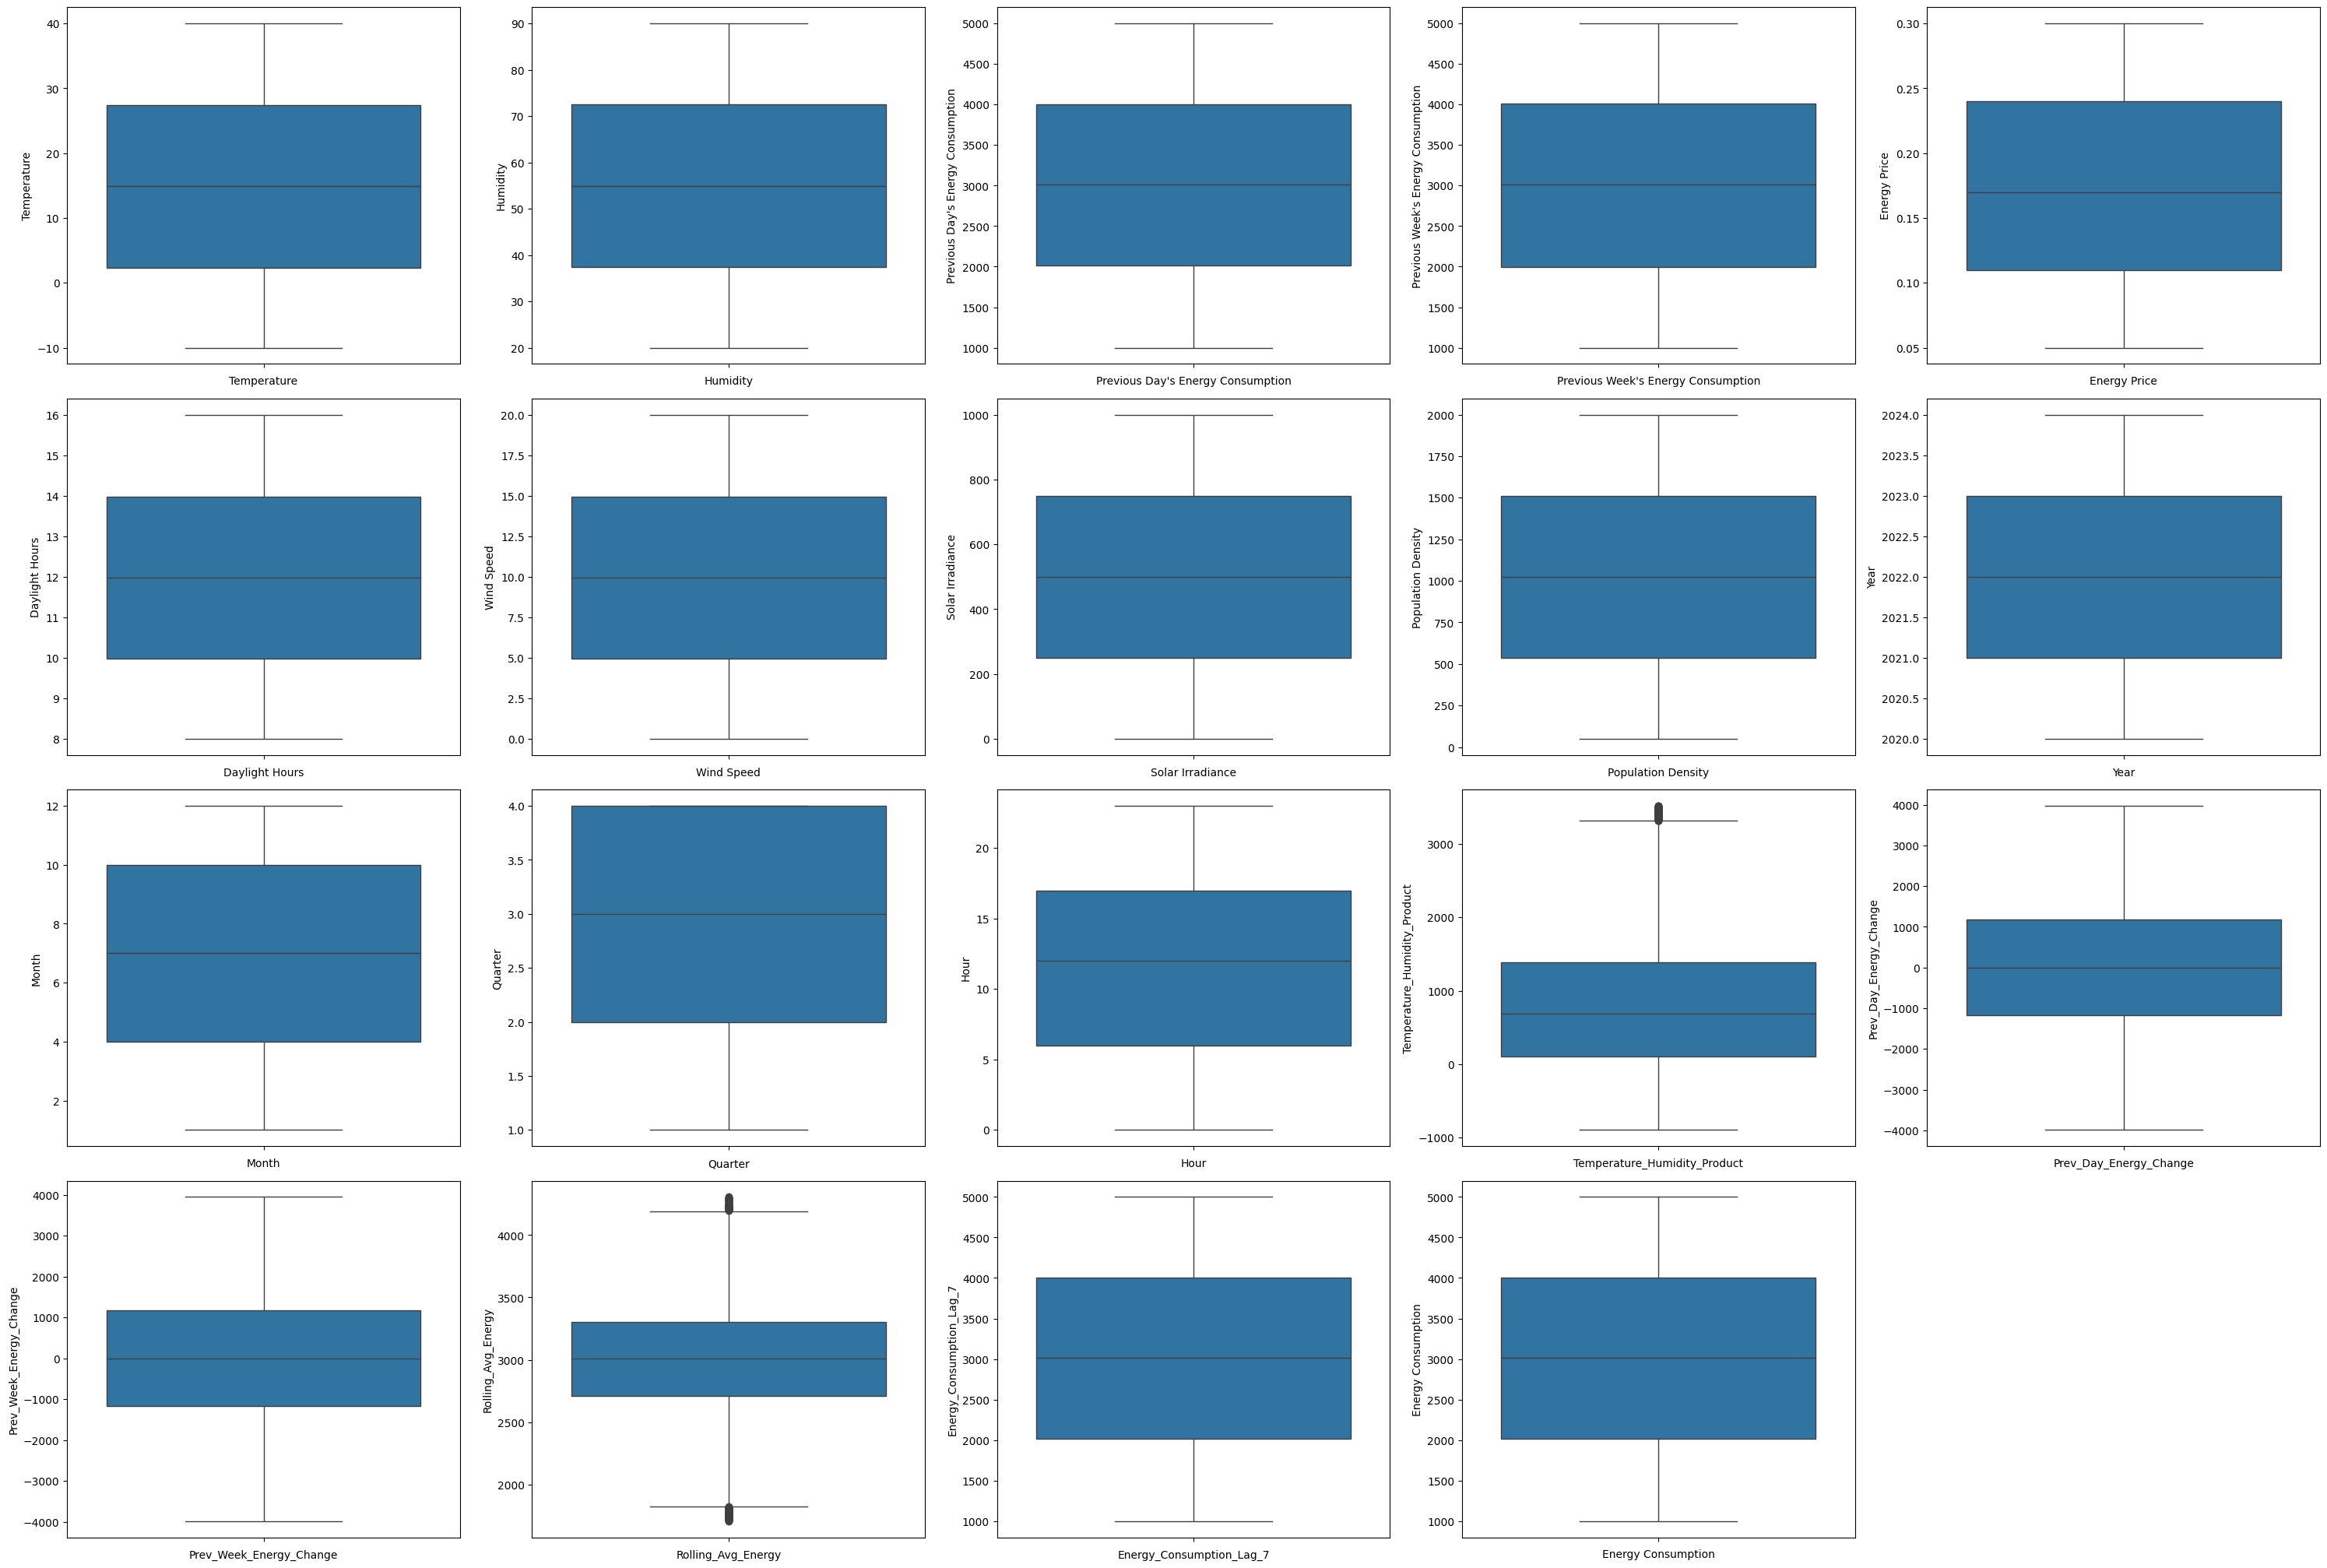

In [20]:
#box plot  after outlier removal

fig = plt.figure(figsize=(30,30))
counter = 0

columns=['Temperature', 'Humidity',
       "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
      'Year', 'Month', 'Quarter', 'Hour',
      'Temperature_Humidity_Product',
       'Prev_Day_Energy_Change', 'Prev_Week_Energy_Change',
       'Rolling_Avg_Energy', 'Energy_Consumption_Lag_7','Energy Consumption']

for col in columns:
    fig.add_subplot(6,5,counter+1)
    sns.boxplot(data=df_new[col])
    plt.xlabel(col)
    counter = counter + 1



plt.tight_layout()
plt.show()

While analysing the box plot its clear that the outliers are removed

## Correlation Matrix for to analyse the correlation between Features

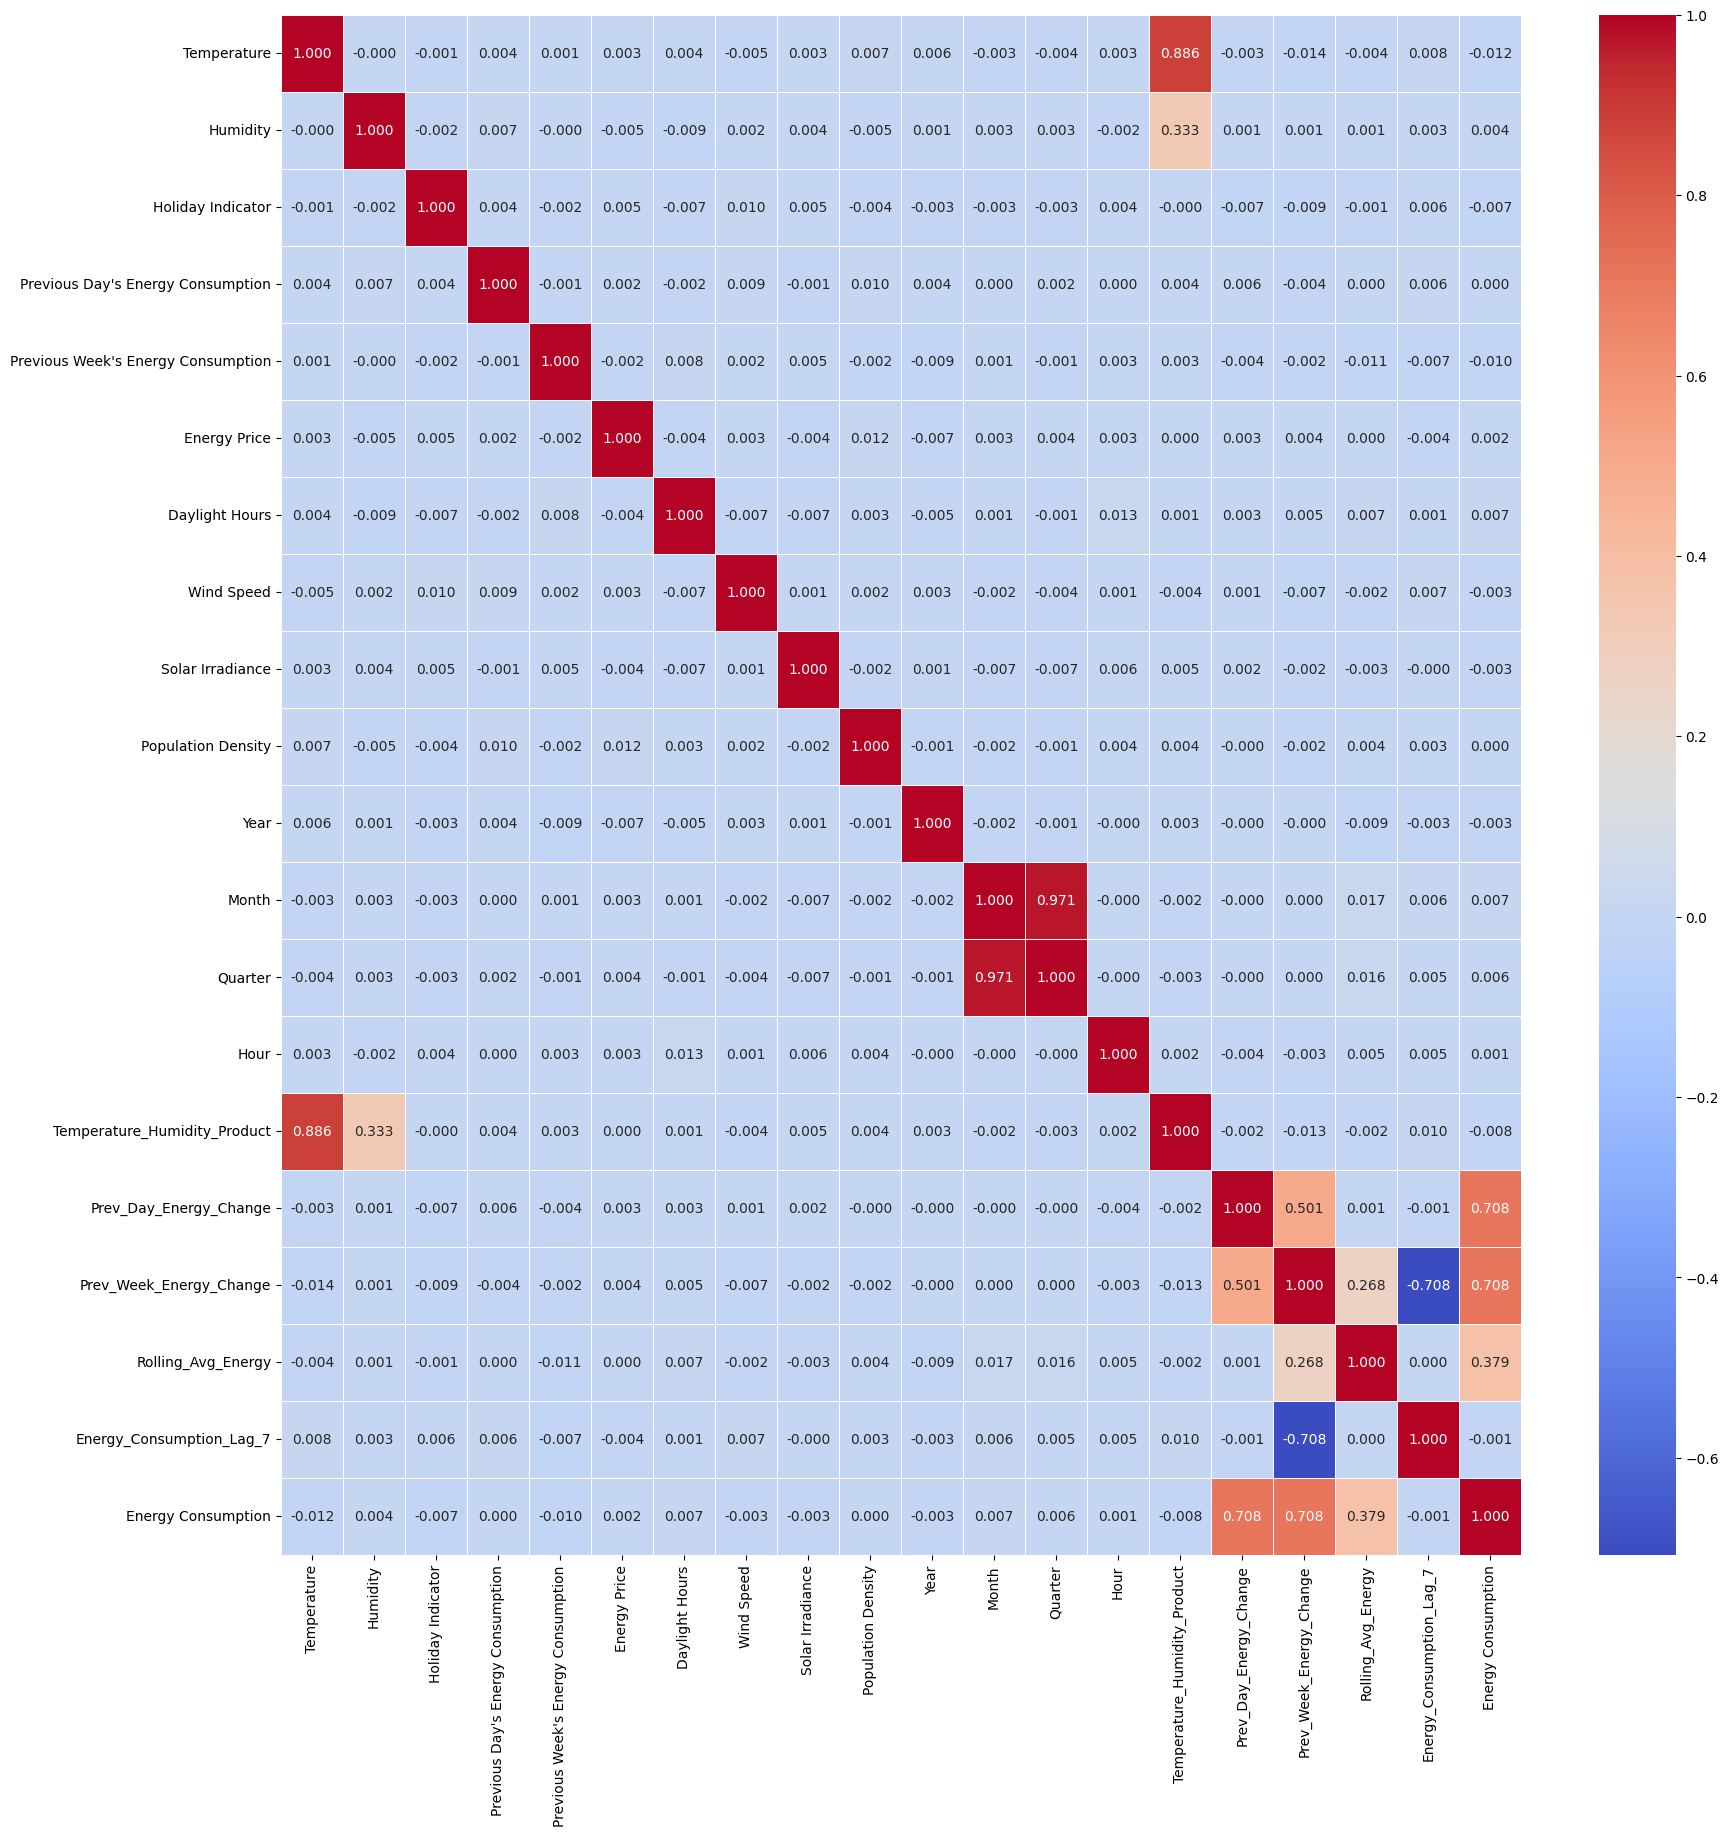

In [21]:
Cols=['Temperature', 'Humidity', 'Holiday Indicator',
       "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
      'Year', 'Month', 'Quarter', 'Hour',
      'Temperature_Humidity_Product',
       'Prev_Day_Energy_Change', 'Prev_Week_Energy_Change',
       'Rolling_Avg_Energy', 'Energy_Consumption_Lag_7','Energy Consumption']



correlation_matrix = df1[Cols].corr()
# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()

A correlation of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases proportionally. A correlation of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally. A correlation of 0 indicates no linear correlation between the variables.

Our Target variable is Energy Consumption. Considering the correlation between Target and independent features prev_day_energy_change and previous_week_energy_change are highly correlated.Rolling_avg_energy, and some other columns are positively correlated and others are negatively correlated.

## 3.Exploratory Data Analysis (EDA):


Visualization of Independent Features and Target

In [ ]:
#Visualising Target Variable
df_new['Energy Consumption'].describe()

count    43737.000000
mean      3008.896236
std       1152.825454
min       1000.030000
25%       2014.520000
50%       3017.740000
75%       4008.500000
max       4999.920000
Name: Energy Consumption, dtype: float64

Text(0.5, 1.0, 'Distribution of Energy Consumption')

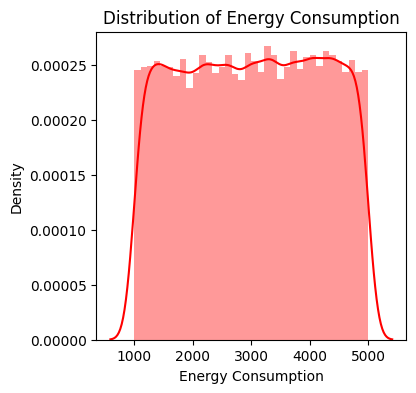

In [ ]:
#Distribution of target variable

plt.figure(figsize=(4,4))
sns.distplot(df_new['Energy Consumption'],color = 'Red')
plt.xlabel('Energy Consumption')
plt.ylabel('Density')
plt.title('Distribution of Energy Consumption')

Text(0, 0.5, 'Frequency')

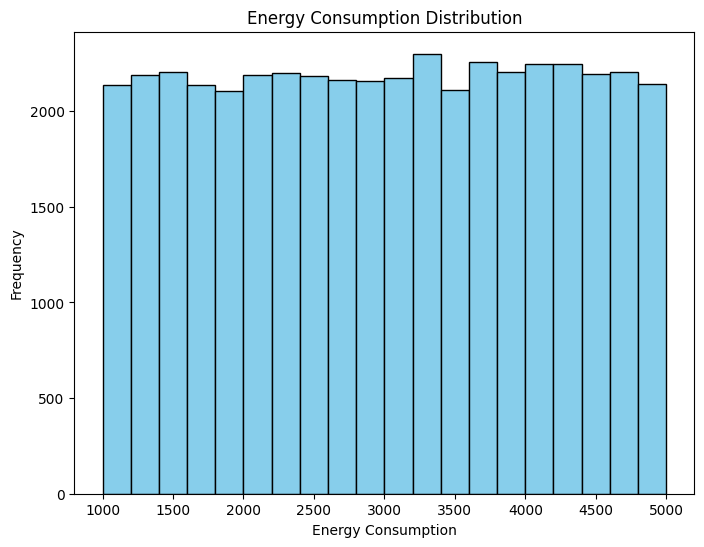

In [ ]:
# Histogram of energy consumption
plt.figure(figsize=(8, 6))
plt.hist(df_new['Energy Consumption'], bins=20, color='skyblue', edgecolor='black')
plt.title('Energy Consumption Distribution')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')

Histogram Shows the frequency distribution of energy consumption values within specified bins,where the bins represent ranges of energy consumption, and the height of each bin indicates the frequency of values within that range.

Density Plot (KDE):

Provides a smooth curve that approximates the distribution of the data.



### Plotting Independent Variables In Univariate analysis

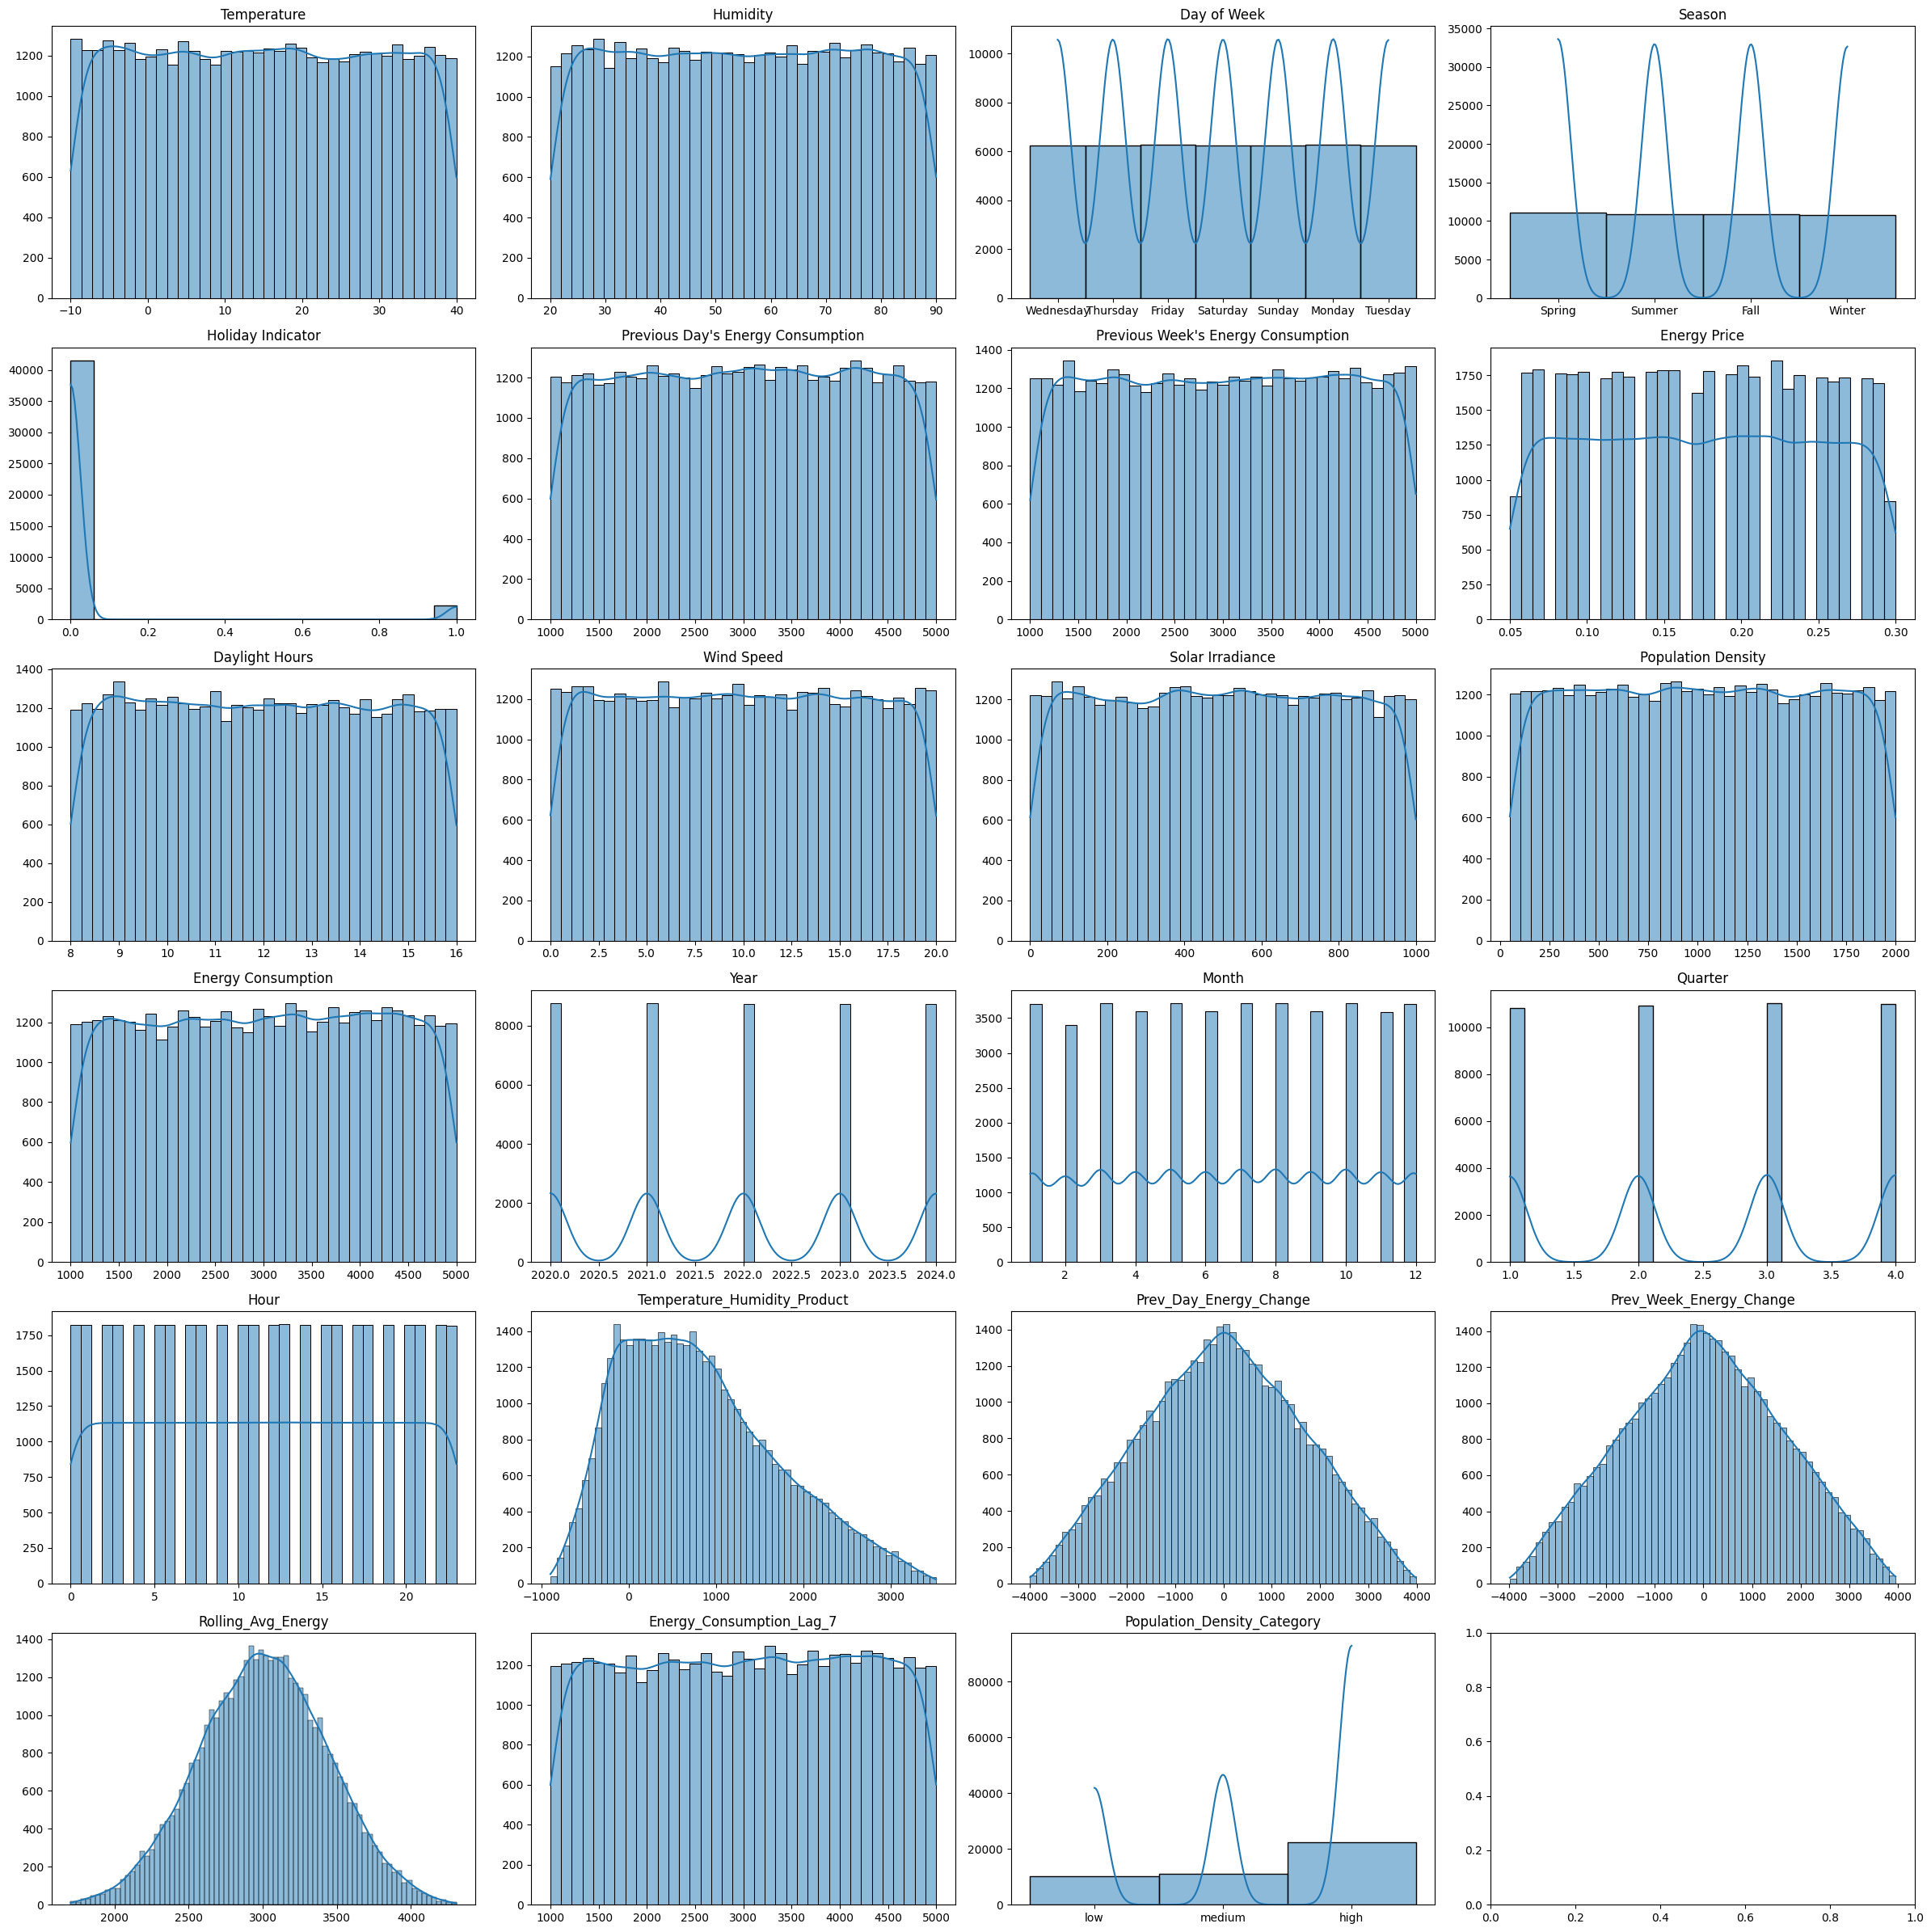

In [ ]:
#Distribution of columns using Hist plot

# Set up figure and axes
fig, axes = plt.subplots(6,4, figsize=(24, 24))
axes = axes.flatten()

columns=['Temperature', 'Humidity', 'Day of Week', 'Season', 'Holiday Indicator',
       "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption', 'Year', 'Month', 'Quarter', 'Hour',
       'Temperature_Humidity_Product', 'Prev_Day_Energy_Change',
       'Prev_Week_Energy_Change', 'Rolling_Avg_Energy',
       'Energy_Consumption_Lag_7', 'Population_Density_Category']

# Plot each column
for i, col in enumerate(columns):
    sns.histplot(df_new[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

## Bivariate Analysis with target and independend variable

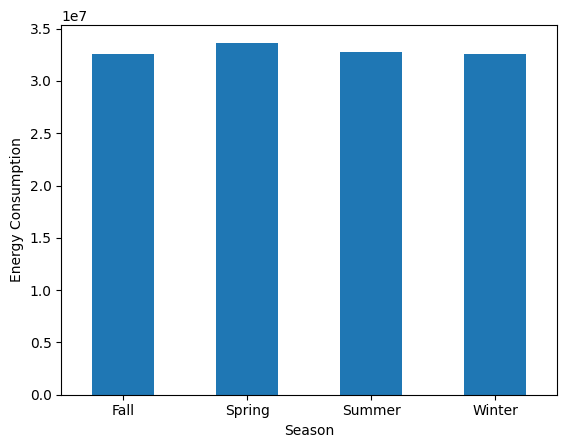

In [22]:
#Plotting Categorical columns
plt1 = df_new[['Season','Energy Consumption']].groupby("Season").sum().plot(kind='bar',legend = False,)
plt1.set_xlabel("Season")
plt1.set_ylabel("Energy Consumption")
xticks(rotation = 0)
plt.show()

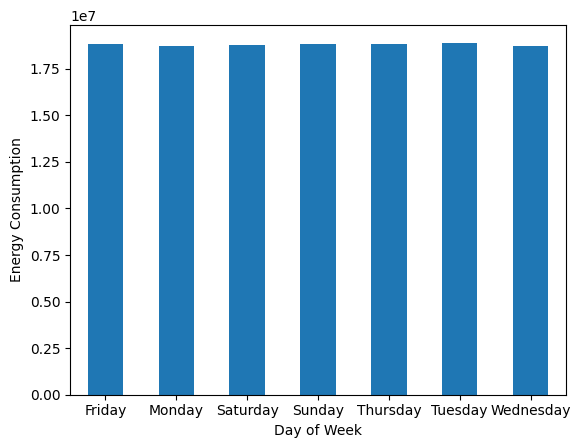

In [21]:
plt1 = df_new[['Day of Week','Energy Consumption']].groupby("Day of Week").sum().plot(kind='bar',legend = False,)
plt1.set_xlabel("Day of Week")
plt1.set_ylabel("Energy Consumption")
xticks(rotation = 0)
plt.show()

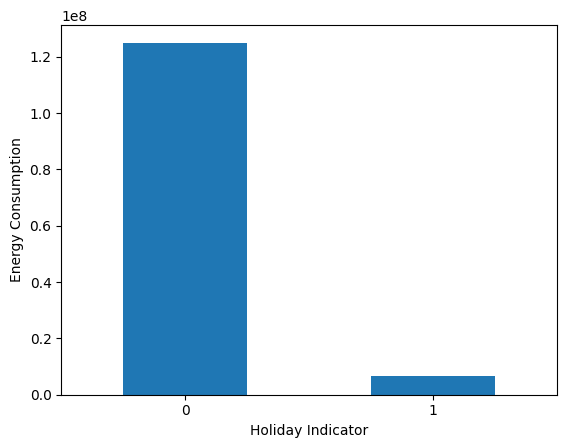

In [20]:
plt1 = df_new[['Holiday Indicator','Energy Consumption']].groupby("Holiday Indicator").sum().plot(kind='bar',legend = False,)
plt1.set_xlabel("Holiday Indicator")
plt1.set_ylabel("Energy Consumption")
xticks(rotation = 0)
plt.show()

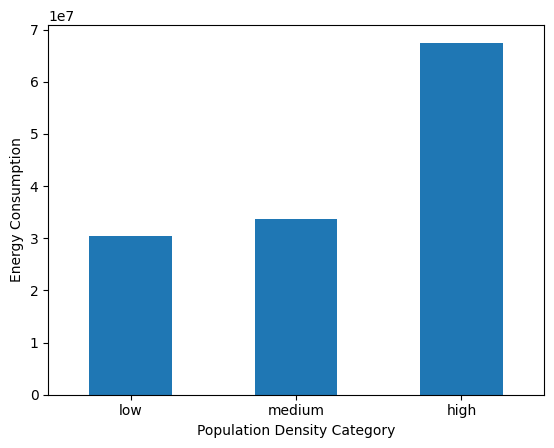

In [19]:
df_grouped =df_new.groupby('Population_Density_Category')['Energy Consumption'].sum()
# Plotting the data
plt1 = df_grouped.plot(kind='bar', x='Population_Density_Category', y='Energy Consumption', legend=False)
plt1.set_xlabel("Population Density Category")
plt1.set_ylabel("Energy Consumption")
plt.xticks(rotation=0)
plt.show()

In [25]:
df_new

,Temperature,Humidity,Day of Week,Season,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,...,Month,Date,Quarter,Hour,Temperature_Humidity_Product,Prev_Day_Energy_Change,Prev_Week_Energy_Change,Rolling_Avg_Energy,Energy_Consumption_Lag_7,Population_Density_Category
Date/Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 07:00:00,34.59,70.69,Wednesday,Spring,1,4736.77,2587.79,0.21,10.21,10.46,...,1,2020-01-01,1,7,2444.95,462.89,1438.86,3568.30,1367.52,high
2020-01-01 08:00:00,38.18,71.70,Wednesday,Spring,0,1299.56,1438.98,0.13,11.52,1.37,...,1,2020-01-01,1,8,2737.55,-261.79,-1533.92,3349.17,4078.50,medium
2020-01-01 09:00:00,9.17,51.13,Wednesday,Summer,0,2990.66,3636.71,0.21,13.90,8.02,...,1,2020-01-01,1,9,469.01,-828.28,-2897.98,2935.17,4614.28,medium
2020-01-01 10:00:00,29.59,54.90,Wednesday,Fall,0,1170.41,2887.36,0.09,10.53,2.59,...,1,2020-01-01,1,10,1624.37,-573.41,-2435.84,2587.19,3578.73,low
2020-01-01 11:00:00,16.44,75.97,Wednesday,Spring,0,4006.64,4284.71,0.20,12.66,17.37,...,1,2020-01-01,1,11,1249.29,-51.09,-3102.41,2143.99,4194.21,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-30 20:00:00,16.22,45.93,Monday,Summer,1,3299.14,3069.52,0.14,12.34,3.69,...,12,2024-12-30,4,20,745.23,-2959.50,-2401.85,2086.99,3488.97,high
2024-12-30 21:00:00,-2.64,64.15,Monday,Fall,0,1435.66,1185.86,0.24,11.17,6.56,...,12,2024-12-30,4,21,-169.27,3190.42,2555.90,2452.12,1721.65,high
2024-12-30 22:00:00,23.73,70.78,Monday,Spring,0,3441.21,3003.36,0.21,15.95,7.28,...,12,2024-12-30,4,22,1679.56,-1362.43,1439.81,2657.81,1475.31,high


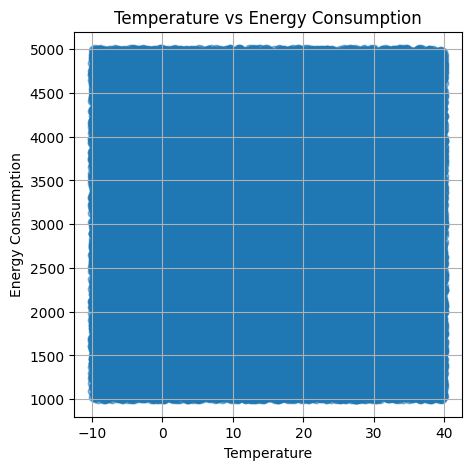

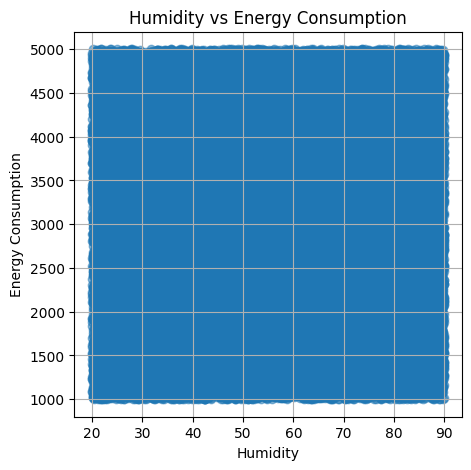

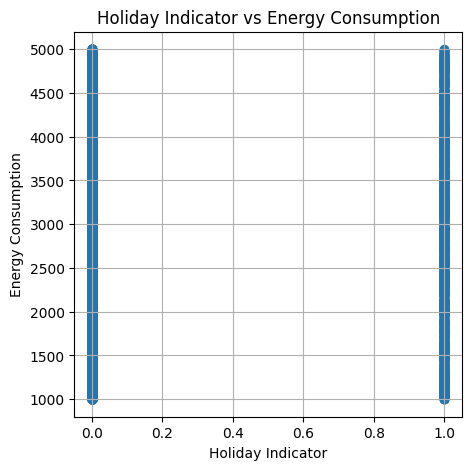

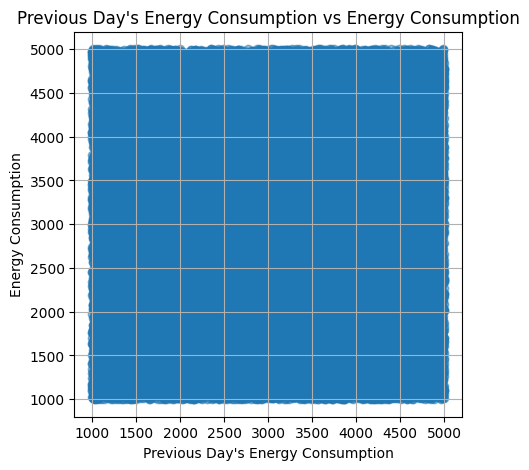

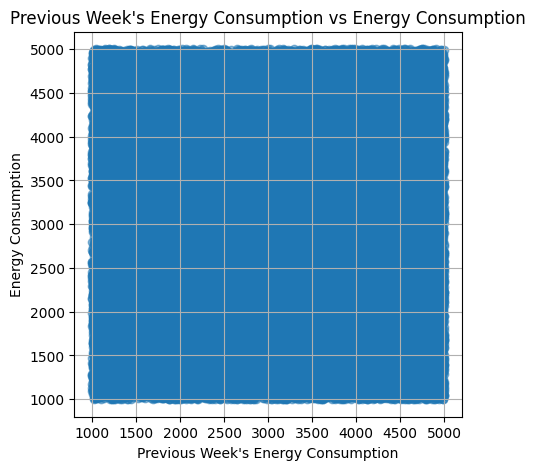

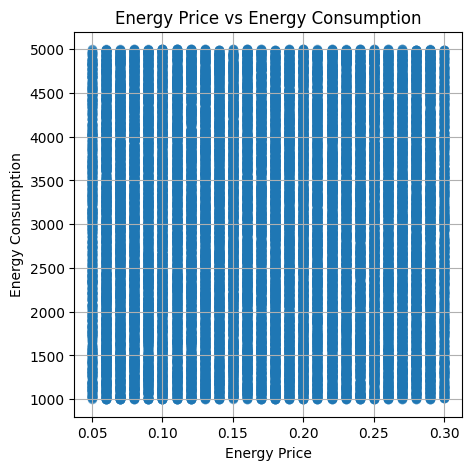

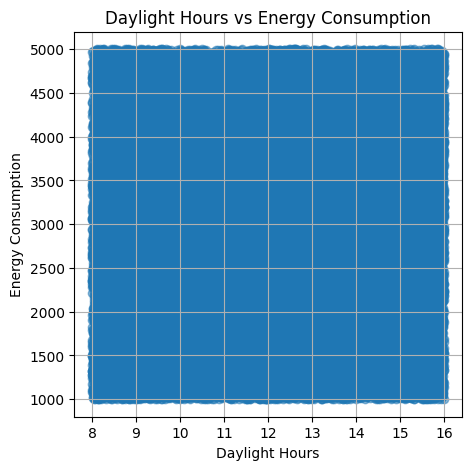

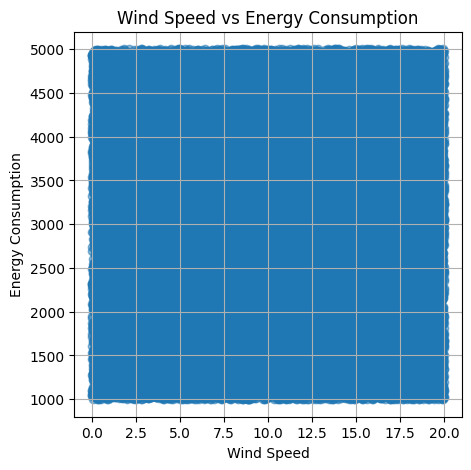

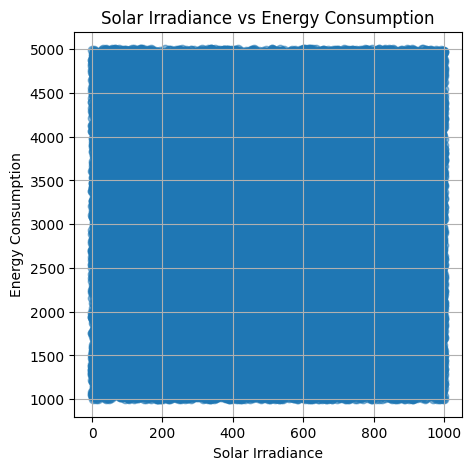

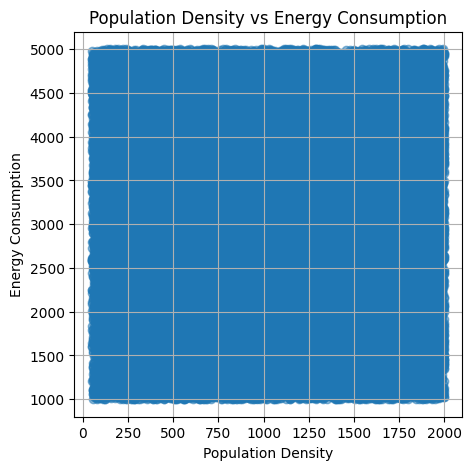

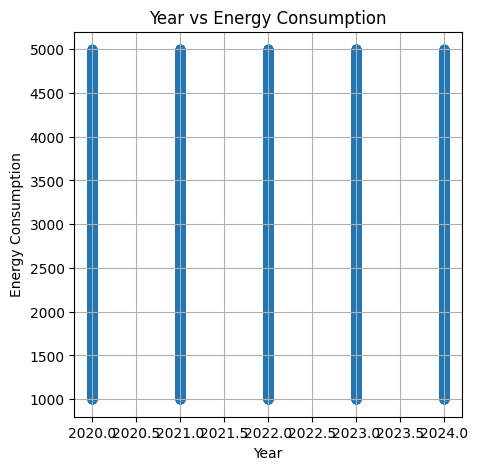

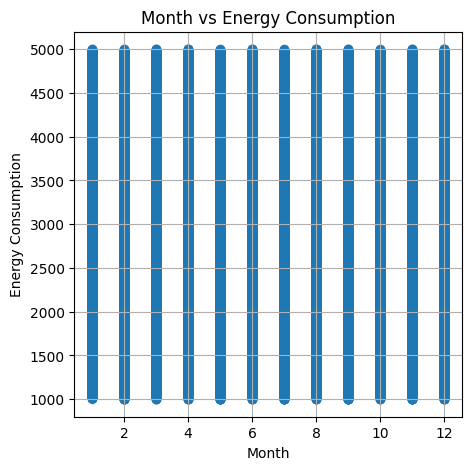

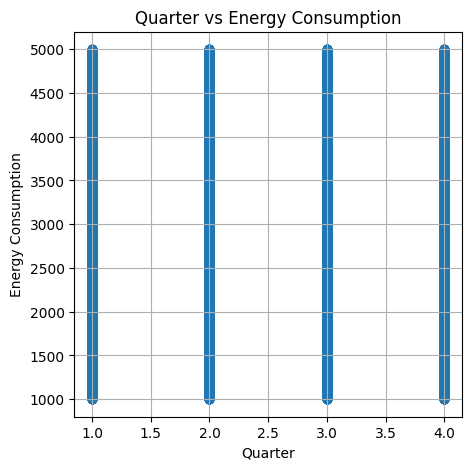

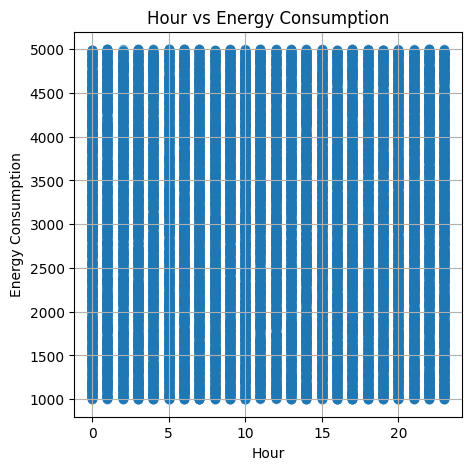

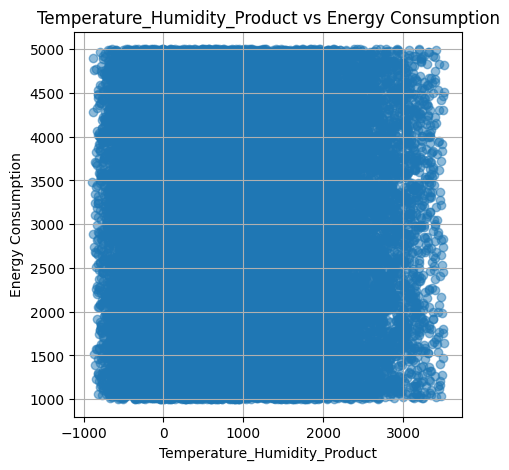

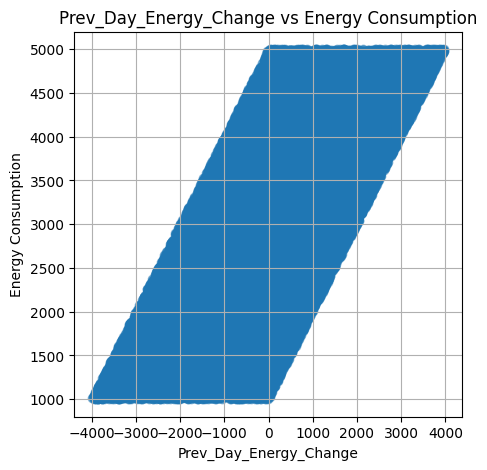

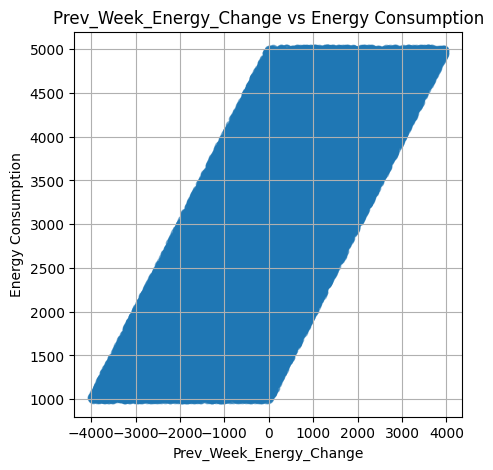

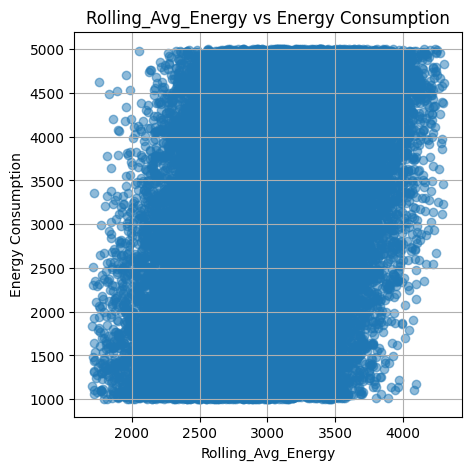

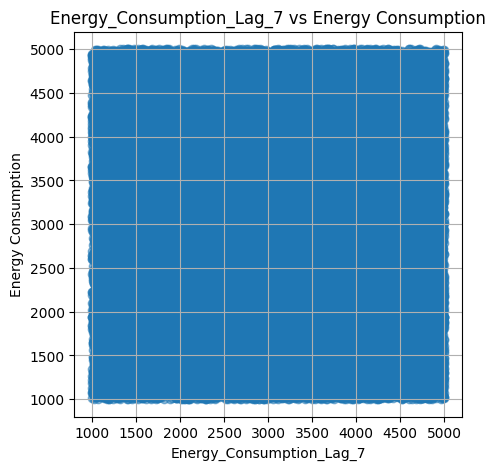

In [33]:
## Plotting Numerical columns and target column

columns_to_plot = ['Temperature', 'Humidity',
       "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
      'Year', 'Month', 'Quarter', 'Hour',
      'Temperature_Humidity_Product',
       'Prev_Day_Energy_Change', 'Prev_Week_Energy_Change',
       'Rolling_Avg_Energy', 'Energy_Consumption_Lag_7']

# Loop through each column and create a plot
for column in columns_to_plot:
    plt.figure(figsize=(5,5))  # Set figure size
    plt.scatter(df_new[column], df_new['Energy Consumption'], alpha=0.5)  # Scatter plot
    plt.title(f'{column} vs Energy Consumption')  # Set title
    plt.xlabel(column)  # Set x-axis label
    plt.ylabel('Energy Consumption')  # Set y-axis label
    plt.grid(True)  # Add grid
    plt.show()  # Show plot

-- Temperture,Humidity is fully scattered

-- Hour is in the range of 0 to 23 that is the entire day hours are calculated and is equally distributed

-- Season is almost equally distributed but comparing with the other three spring season is high

-- Previous Day's Energy Consumption,Previous Week's Energy Consumption, Energy Price, Daylight Hours, Wind Speed, Solar Irradiance,Population Density are equally distributed.

-- Temperature_Humidity_Product is fully scattered.

-- 'Prev_Day_Energy_Change', 'Prev_Week_Energy_Change',
       'Rolling_Avg_Energy' graphs are almost same with the target values.

# Label Encoding

Label encoding is a technique used in data preprocessing to convert categorical variables into numerical values so that they can be used in machine learning algorithms. Here Im using label encoding because im having 3 ordinal columns to encode.

In [34]:


#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Day of Week is the column representing the day of the week (e.g., Monday, Tuesday, etc.)
weekday_encoder = LabelEncoder()
df_new['Weekday_encoded'] = weekday_encoder.fit_transform(df_new['Day of Week'])

#  'Season' is the column representing the season (e.g., Spring, Summer, etc.)
season_encoder = LabelEncoder()
df_new['Season_encoded'] = season_encoder.fit_transform(df_new['Season'])

# Population_Density_Category is the column representing density category(eg. Low,Medium,high)
Population_Density_Category_encoder = LabelEncoder()
df_new['Population_Density_Category_Encoder'] = Population_Density_Category_encoder.fit_transform(df_new['Population_Density_Category'])

# Dropping the columns that are encoded
df_new.drop(columns=['Day of Week', 'Season','Population_Density_Category'], inplace=True)


In [35]:
df_new.isnull().sum()

Temperature                            0
Humidity                               0
Holiday Indicator                      0
Previous Day's Energy Consumption      0
Previous Week's Energy Consumption     0
Energy Price                           0
Daylight Hours                         0
Wind Speed                             0
Solar Irradiance                       0
Population Density                     0
Energy Consumption                     0
Year                                   0
Month                                  0
Date                                   0
Quarter                                0
Hour                                   0
Temperature_Humidity_Product           0
Prev_Day_Energy_Change                 0
Prev_Week_Energy_Change                0
Rolling_Avg_Energy                     0
Energy_Consumption_Lag_7               0
Weekday_encoded                        0
Season_encoded                         0
Population_Density_Category_Encoder    0
dtype: int64

### Feature selection

Feature selection is an important step in machine learning to improve the performance and interpretability of models by removing irrelevant or redundant features. One common technique for feature selection is SelectKBest from scikit-learn, which selects the top k features based on a scoring functionand here i used f_regression to select the top k features based on their F-values.

In [36]:
#Separating the target and independent features separately to Y and X. Also removed the Date column because the necessary data are extracted from date as
X=pd.DataFrame(df_new.drop(columns=['Energy Consumption','Date'],axis=1))

Y=pd.DataFrame(df_new['Energy Consumption'])

In [37]:
# Importing module and Split data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
# Importing Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Initialize SelectKBest with the f_regression scoring function (suitable for regression)
selector = SelectKBest(score_func=f_regression, k=5)

# Fit the selector to your data
selector.fit(X, Y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Subset your feature matrix with the selected features
X_selected_best = X[selected_features]
X_selected_best.columns

Index(['Temperature', 'Previous Week's Energy Consumption',
       'Prev_Day_Energy_Change', 'Prev_Week_Energy_Change',
       'Rolling_Avg_Energy'],
      dtype='object')

When i set k=5, i got the best 8 features that are,'Temperature', 'Previous Week's Energy Consumption', 'Prev_Day_Energy_Change',
'Prev_Week_Energy_Change', 'Rolling_Avg_Energy'. lets use these 5 features to build the model

## Scaling

Scaling is an important preprocessing step in machine learning, especially for algorithms that are sensitive to the scale of data.It involves transforming the features to a standard range or distribution. Here i use MinMax scaling,it transforms the data to a fixed range, usually [0, 1].

In [39]:
# Before scaling need to change the index to numeric , currently it is in date time format
df_new.reset_index(drop=True, inplace=True)

In [41]:
#Changed df head
df_new.head()

,Temperature,Humidity,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,...,Quarter,Hour,Temperature_Humidity_Product,Prev_Day_Energy_Change,Prev_Week_Energy_Change,Rolling_Avg_Energy,Energy_Consumption_Lag_7,Weekday_encoded,Season_encoded,Population_Density_Category_Encoder
0,34.59,70.69,1,4736.77,2587.79,0.21,10.21,10.46,838.10,1259.64,...,1,7,2444.95,462.89,1438.86,3568.30,1367.52,6,1,0
1,38.18,71.70,0,1299.56,1438.98,0.13,11.52,1.37,233.16,696.15,...,1,8,2737.55,-261.79,-1533.92,3349.17,4078.50,6,1,2
2,9.17,51.13,0,2990.66,3636.71,0.21,13.90,8.02,943.16,783.21,...,1,9,469.01,-828.28,-2897.98,2935.17,4614.28,6,2,2
3,29.59,54.90,0,1170.41,2887.36,0.09,10.53,2.59,84.43,87.63,...,1,10,1624.37,-573.41,-2435.84,2587.19,3578.73,6,0,1
4,16.44,75.97,0,4006.64,4284.71,0.20,12.66,17.37,362.80,1511.44,...,1,11,1249.29,-51.09,-3102.41,2143.99,4194.21,6,1,0


In [60]:
# Importing Scaler
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train is your feature matrix
scaler = MinMaxScaler()

# Separating the columns
Min_col = df_new[[ 'Temperature', 'Humidity', 'Daylight Hours', 'Wind Speed',
                   'Solar Irradiance', 'Population Density', "Previous Day's Energy Consumption",
       'Energy Price', "Previous Week's Energy Consumption",
       'Temperature_Humidity_Product',
       'Prev_Day_Energy_Change', 'Prev_Week_Energy_Change',
       'Rolling_Avg_Energy', 'Energy_Consumption_Lag_7','Year','Month']]
cols = df_new[['Quarter', 'Hour','Weekday_encoded','Season_encoded',
                   'Holiday Indicator','Date','Population_Density_Category_Encoder','Energy Consumption']]

# Scaling
X_scaled = scaler.fit_transform(Min_col)

# Convert scaled arrays to DataFrames
X_scaled_df = pd.DataFrame(X_scaled, columns=Min_col.columns)


# Concatenate scaled numeric columns with non-scaled columns
scaled_df = pd.concat([X_scaled_df, cols], axis=1)

In [45]:
# df before scaling
df_new

,Temperature,Humidity,Holiday Indicator,Previous Day's Energy Consumption,Previous Week's Energy Consumption,Energy Price,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,...,Quarter,Hour,Temperature_Humidity_Product,Prev_Day_Energy_Change,Prev_Week_Energy_Change,Rolling_Avg_Energy,Energy_Consumption_Lag_7,Weekday_encoded,Season_encoded,Population_Density_Category_Encoder
0,34.59,70.69,1,4736.77,2587.79,0.21,10.21,10.46,838.10,1259.64,...,1,7,2444.95,462.89,1438.86,3568.30,1367.52,6,1,0
1,38.18,71.70,0,1299.56,1438.98,0.13,11.52,1.37,233.16,696.15,...,1,8,2737.55,-261.79,-1533.92,3349.17,4078.50,6,1,2
2,9.17,51.13,0,2990.66,3636.71,0.21,13.90,8.02,943.16,783.21,...,1,9,469.01,-828.28,-2897.98,2935.17,4614.28,6,2,2
3,29.59,54.90,0,1170.41,2887.36,0.09,10.53,2.59,84.43,87.63,...,1,10,1624.37,-573.41,-2435.84,2587.19,3578.73,6,0,1
4,16.44,75.97,0,4006.64,4284.71,0.20,12.66,17.37,362.80,1511.44,...,1,11,1249.29,-51.09,-3102.41,2143.99,4194.21,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43732,16.22,45.93,1,3299.14,3069.52,0.14,12.34,3.69,666.59,1538.23,...,4,20,745.23,-2959.50,-2401.85,2086.99,3488.97,1,2,0
43733,-2.64,64.15,0,1435.66,1185.86,0.24,11.17,6.56,772.78,1641.83,...,4,21,-169.27,3190.42,2555.90,2452.12,1721.65,1,0,0
43734,23.73,70.78,0,3441.21,3003.36,0.21,15.95,7.28,567.13,1800.06,...,4,22,1679.56,-1362.43,1439.81,2657.81,1475.31,1,1,0
43735,12.92,40.57,0,1200.16,4850.11,0.29,14.60,7.21,27.14,926.48,...,4,23,524.19,29.44,1866.13,2924.40,1078.43,1,1,2


In [46]:
#df after scaling
scaled_df

,Temperature,Humidity,Daylight Hours,Wind Speed,Solar Irradiance,Population Density,Previous Day's Energy Consumption,Energy Price,Previous Week's Energy Consumption,Temperature_Humidity_Product,...,Year,Month,Quarter,Hour,Weekday_encoded,Season_encoded,Holiday Indicator,Date,Population_Density_Category_Encoder,Energy Consumption
0,0.8918,0.724143,0.27625,0.5230,0.838152,0.620329,0.934212,0.64,0.396940,0.756846,...,0.0,0.0,1,7,6,1,1,2020-01-01,0,2806.38
1,0.9636,0.738571,0.44000,0.0685,0.233146,0.331357,0.074834,0.32,0.109734,0.823158,...,0.0,0.0,1,8,6,1,0,2020-01-01,2,2544.58
2,0.3834,0.444714,0.73750,0.4010,0.943224,0.376004,0.497646,0.64,0.659173,0.309039,...,0.0,0.0,1,9,6,2,0,2020-01-01,2,1716.30
3,0.7918,0.498571,0.31625,0.1295,0.084399,0.019293,0.042544,0.16,0.471833,0.570879,...,0.0,0.0,1,10,6,0,0,2020-01-01,1,1142.89
4,0.5288,0.799571,0.58250,0.8685,0.362800,0.749459,0.751663,0.60,0.821175,0.485874,...,0.0,0.0,1,11,6,1,0,2020-01-01,0,1091.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43732,0.5244,0.370429,0.54250,0.1845,0.666623,0.763198,0.574773,0.36,0.517374,0.371639,...,1.0,1.0,4,20,1,2,1,2024-12-30,0,1087.12
43733,0.1472,0.630714,0.39625,0.3280,0.772825,0.816326,0.108862,0.76,0.046453,0.164386,...,1.0,1.0,4,21,1,0,0,2024-12-30,0,4277.55
43734,0.6746,0.725429,0.99375,0.3640,0.567152,0.897471,0.610293,0.64,0.500834,0.583386,...,1.0,1.0,4,22,1,1,0,2024-12-30,0,2915.12
43735,0.4584,0.293857,0.82500,0.3605,0.027103,0.449476,0.049982,0.96,0.962527,0.321545,...,1.0,1.0,4,23,1,1,0,2024-12-30,2,2944.56


In [47]:
# checking for null values
scaled_df.isnull().sum()

Temperature                            0
Humidity                               0
Daylight Hours                         0
Wind Speed                             0
Solar Irradiance                       0
Population Density                     0
Previous Day's Energy Consumption      0
Energy Price                           0
Previous Week's Energy Consumption     0
Temperature_Humidity_Product           0
Prev_Day_Energy_Change                 0
Prev_Week_Energy_Change                0
Rolling_Avg_Energy                     0
Energy_Consumption_Lag_7               0
Year                                   0
Month                                  0
Quarter                                0
Hour                                   0
Weekday_encoded                        0
Season_encoded                         0
Holiday Indicator                      0
Date                                   0
Population_Density_Category_Encoder    0
Energy Consumption                     0
dtype: int64

 ##  4.Model Development


In [61]:
## X_best is the columns extracted from Scaled_df Using Select KBest Feature Selection
X_best=scaled_df[['Temperature', "Previous Week's Energy Consumption",
        'Prev_Day_Energy_Change',
       'Prev_Week_Energy_Change', 'Rolling_Avg_Energy']]

y= scaled_df['Energy Consumption']

# 1. RANDOM FOREST REGRESSOR

In [62]:
# Splitting dataset for training and testing
x_train, x_test, Y_train, Y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

In [63]:
# using select k best output
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_train, Y_train)

RandomForestRegressor(random_state=42)

In [64]:
# PREDICTED VALUES
Random_PredictedTest=random_forest.predict(x_test)
Random_PredictedTest

array([2846.7932, 1429.5454, 2323.4553, ..., 4249.816 , 1701.8551,
       4766.9843])

In [59]:
# Calculating the output efficiency and error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print("Random Forest:")
mae=mean_absolute_error(Y_test, Random_PredictedTest)
mse=mean_squared_error(Y_test, Random_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(Y_test, Random_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Random Forest:
Mean Absolute Error(MAE): 439.45675534979426
Mean Squared Error(MSE): 317107.90650781046
rmse: 563.1233492830949
R Squared: 0.7588280272931096


# 2. GRADIENT BOOSTING REGRESSOR

In [65]:
# GB model building
GradientBoosting = GradientBoostingRegressor(random_state=42)
GradientBoosting.fit(x_train, Y_train)
print("Gradient Boosting Regressor:")



Gradient Boosting Regressor:


array([2810.69189574, 1530.43843514, 2222.02747076, ..., 4206.34841126,
       1625.99594901, 4847.73069842])

In [ ]:
#Predicting values
Gradient_PredictedTest=GradientBoosting.predict(x_test)
Gradient_PredictedTest



In [66]:
# Calculating the output efficiency and error
mae=mean_absolute_error(Y_test, Gradient_PredictedTest)
mse=mean_squared_error(Y_test, Gradient_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(Y_test, Gradient_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2*100)

Mean Absolute Error(MAE): 436.17114220079986
Mean Squared Error(MSE): 306466.89166371315
rmse: 553.5945191778122
R Squared: 76.69209019546597


# 3. SUPPORT VECTOR REGRESSOR

In [67]:
# Importing SVR
from sklearn.svm import SVR

# Model building
svr_model = SVR()
svr_model.fit(x_train, Y_train)






array([2799.98131739, 1990.5278624 , 2307.03804715, ..., 4144.18222142,
       1949.99151934, 4433.60998596])

In [68]:
# Predictions

svr_PredictedTest = svr_model.predict(x_test)
svr_PredictedTest

array([2799.98131739, 1990.5278624 , 2307.03804715, ..., 4144.18222142,
       1949.99151934, 4433.60998596])

In [69]:
# Calculating the output efficiency and error
print("Support Vector Machine(SVM):")
mae=mean_absolute_error(Y_test, svr_PredictedTest)
mse=mean_squared_error(Y_test, svr_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(Y_test,svr_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Support Vector Machine(SVM):
Mean Absolute Error(MAE): 546.3963036528032
Mean Squared Error(MSE): 429598.6946436078
rmse: 655.4377885380181
R Squared: 0.6732747354031929


## CROSS VALIDATION FOR THREE MODELS

In [70]:
#cross validation for random forest
from sklearn.model_selection import cross_val_score
scores_rf=cross_val_score(random_forest,x_train,Y_train,cv=5)

In [71]:
scores_rf

array([0.76319998, 0.7614967 , 0.76154217, 0.76489566, 0.75805956])

In [72]:
scores_rf.mean()

0.761838812018138

In [ ]:
#cross validation for GradientBoosting
from sklearn.model_selection import cross_val_score
scores_gb=cross_val_score(GradientBoosting,x_train,Y_train,cv=5)

In [ ]:
scores_gb

array([0.77888889, 0.77426381, 0.77386824, 0.77323858, 0.76573604])

In [ ]:
scores_gb.mean()

0.7731991086288892

In [75]:
#cross validation for SVR

from sklearn.model_selection import cross_val_score
scores_svr=cross_val_score(svr_model,x_train,Y_train,cv=5)

In [76]:
scores_svr

array([0.66527858, 0.66211039, 0.66076487, 0.65667204, 0.65640983])

In [77]:
scores_svr.mean()

0.6602471406094708

In [73]:
# Evaluate each model

models = {'random_forest' : RandomForestRegressor(random_state=42),
          'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'svr_model' : SVR()}


def evaluate_model(model, x_train, x_test, Y_train, Y_test):
    model.fit(x_train, Y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)
    return mae, mse, rmse, r2
results = {}
for name, model in models.items():
    mae, mse, rmse, r2 = evaluate_model(model, x_train, x_test, Y_train, Y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Print results
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2
random_forest,439.456755,317107.906508,563.123349,0.758828
GradientBoosting,436.171142,306466.891664,553.594519,0.766921
svr_model,546.396304,429598.694644,655.437789,0.673275


# Conclusion
Our aim is to analyzing energy consumption patterns in a power grid system. For that we analyse the data,plotted graphs,do proper EDA and all. After that build 3 ML models for analysis purpose. Got a predicted data to analyse is affected the entire process but try to make the better model with that.

1.Key Findings

Dataset contains 43825 rows and 15 columns. Out of which contains numeric and categorical columns. In addition to that i added 11 columns and removed some columns from the existing dataset.

While analysing the dataset its clear that the season,year and time is not that much significant to the energy consumption.

The newly added features are more  correlated to target.


2.Model Performance

Performance is good with low mse and approximately 0.7 r2 score.

Implementing demand-response strategies or investing in renewable energy sources will good to predict the value.

By analysing with more steps we have to improve energy efficiency and sustainability in the power grid system.

3.Future Work

We can make time series forcasting models with this dataset.


# References
1.https://github.com/maulikt04/Energy-Consumption-Prediction-by-using-Machine-learning-Techaniques

2.ChatGPT

3.YouTube and Google